<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/netflix_business_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['netflix.csv']))
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# Check nulls
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Fill missing values safely (no warning)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Drop rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

# Fill rating if needed
df['rating'] = df['rating'].fillna('Not Rated')



In [ ]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()


Shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract useful time features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['week_added'] = df['date_added'].dt.isocalendar().week
df['dayofweek_added'] = df['date_added'].dt.day_name()


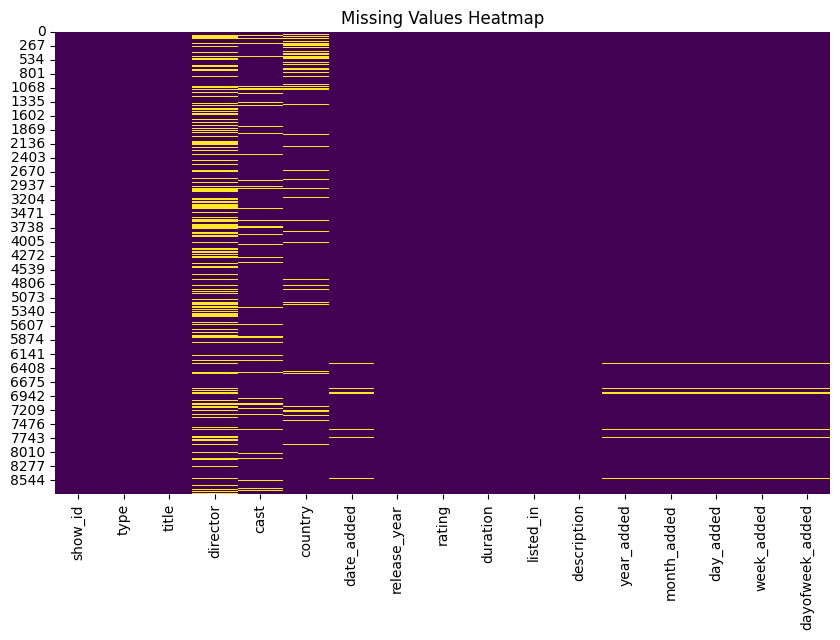

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Make sure the fields are strings before applying split
df['cast'] = df['cast'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else x)
df['director'] = df['director'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else x)
df['listed_in'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else x)

# Now safely explode
df_cast = df.explode('cast')
df_director = df.explode('director')
df_genre = df.explode('listed_in')



In [ ]:
df.shape #length of data


(8807, 12)

In [ ]:
df.dtypes #checking data types

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
year_added                float64
month_added               float64
day_added                 float64
week_added                 UInt32
dayofweek_added            object
dtype: object

In [ ]:
for i in df.columns:
  print (i,'1',df[i].nunique()) # number of unique values in our data

show_id 1 8807
type 1 2
title 1 8807
director 1 4528
cast 1 7692
country 1 748
date_added 1 1699
release_year 1 74
rating 1 17
duration 1 220
listed_in 1 514
description 1 8775
year_added 1 14
month_added 1 12
day_added 1 31
week_added 1 53
dayofweek_added 1 7


In [ ]:
df.isnull().sum() #checking the null value of every column  each data

show_id               0
type                  0
title                 0
director           2634
cast                825
country             831
date_added           98
release_year          0
rating                4
duration              3
listed_in             0
description           0
year_added           98
month_added          98
day_added            98
week_added           98
dayofweek_added      98
dtype: int64

In [ ]:
#Count Occurrence of Each Rating
df['rating'].value_counts()

In [ ]:
#checking the occurance of each of the rating
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

numerical values has come here

In [ ]:
con1=df['director'].apply(lambda x:str(x).split(', ')).tolist() #list of list for directors

In [ ]:
con1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [ ]:
df_new1 = pd.DataFrame(con1, index=df['title'])
df_new1

0     1     2     3     4     5     6   \
title                                                                        
Dick Johnson Is Dead   Kirsten Johnson  None  None  None  None  None  None   
Blood & Water                      nan  None  None  None  None  None  None   
Ganglands              Julien Leclercq  None  None  None  None  None  None   
Jailbirds New Orleans              nan  None  None  None  None  None  None   
Kota Factory                       nan  None  None  None  None  None  None   
...                                ...   ...   ...   ...   ...   ...   ...   
Zodiac                   David Fincher  None  None  None  None  None  None   
Zombie Dumb                        nan  None  None  None  None  None  None   
Zombieland             Ruben Fleischer  None  None  None  None  None  None   
Zoom                      Peter Hewitt  None  None  None  None  None  None   
Zubaan                     Mozez Singh  None  None  None  None  None  None   

                         7     8     9     10    11    12  
title                                                      
Dick Johnson Is Dead   None  None  None  None  None  None  
Blood & Water          None  None  None  None  None  None  
Ganglands              None  None  None  None  None  None  
Jailbirds New Orleans  None  None  None  None  None  None  
Kota Factory           None  None  None  None  None  None  
...                     ...   ...   ...   ...   ...   ...  
Zodiac                 None  None  None  None  None  None  
Zombie Dumb            None  None  None  None  None  None  
Zombieland             None  None  None  None  None  None  
Zoom                   None  None  None  None  None  None  
Zubaan                 None  None  None  None  None  None  

[8807 rows x 13 columns]

In [ ]:
constraint1 = df['director'].apply(lambda x: str(x).split(', ')).tolist() #
df_new1 = pd.DataFrame(constraint1, index=df['title'])
df_new2 = df_new1.stack()
df_new3 = df_new2.reset_index()
df_new3.columns = ['title', 'level_3', 'director']
df_new3.sample(20)

title  level_3             director
1482                               June & Kopi        0    Noviandra Santosa
5100   The Could’ve-Gone-All-the-Way Committee        0                  nan
9022                               The Dreamer        0            Riri Riza
2223                                 Bookmarks        0                  nan
8455         Power Rangers Operation Overdrive        0                  nan
5646  Equestria Girls: Tales of Canterlot High        0                  nan
1214                  Ibrahim a Fate to Define        0         Lina Al Abed
5381               Gad Elmaleh: American Dream        0        Michael Simon
7664        Indiana Jones and the Last Crusade        0     Steven Spielberg
3498                                 Zona Rosa        0                  nan
3971                     Cities of Last Things        0           Wi Ding Ho
5576                                The Method        0                  nan
4854                                    Soorma        0            Shaad Ali
4660          Super Monsters and the Wish Star        0          Jacob Joice
3923                     No One Will Ever Know        0  Jesús Torres Torres
5788                       I Called Him Morgan        0        Kasper Collin
9008                              The Daughter        0          Simon Stone
6267                           Children of God        0        John Smithson
7860                         Kurt Seyit & Sura        0                  nan
4014                   Daniel Sosa: Maleducado        0            Alex Díaz

In [ ]:
df_new1[df_new1[2].isnull()].head()


In [ ]:
df_new1

In [ ]:
# Importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix (2)')
df.head()

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix.csv')

# View the first few records
print("Sample Records:")
display(df.head())

# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic info about data types and non-null counts
print("\nDataset Info:")
df.info()

# Descriptive statistics for numerical and object columns
print("\nSummary Statistics:")
display(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
display(missing_df)


Sample Records:


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

Dataset contains 8807 rows and 12 columns.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Summary Statistics:


show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            748             1767           NaN     17       220   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2818              109           NaN   3207      1793   
mean              NaN              NaN   2014.180198    NaN       NaN   
std               NaN              NaN      8.819312    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2019.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN


Missing Values:


Missing Values  Missing %
director                2634  29.908028
country                  831   9.435676
cast                     825   9.367549
date_added                10   0.113546
rating                     4   0.045418
duration                   3   0.034064
show_id                    0   0.000000
type                       0   0.000000
title                      0   0.000000
release_year               0   0.000000
listed_in                  0   0.000000
description                0   0.000000

In [ ]:
# Convert appropriate object columns to category to optimize memory and performance
cat_cols = ['type', 'rating', 'country', 'listed_in']
for col in cat_cols:
    df[col] = df[col].astype('category')

print("\nConverted selected object columns to 'category' type.")



Converted selected object columns to 'category' type.


In [ ]:
# Convert selected object columns to 'category' type
cat_columns = ['type', 'rating', 'country', 'listed_in']

for col in cat_columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Check updated data types
print("\nUpdated Data Types:")
display(df.dtypes[cat_columns])



Updated Data Types:


type         category
rating       category
country      category
listed_in    category
dtype: object

In [ ]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Value Summary:")
display(missing_summary)



Missing Value Summary:


Missing Count  Missing %
director               2634  29.908028
country                 831   9.435676
cast                    825   9.367549
date_added               10   0.113546
rating                    4   0.045418
duration                  3   0.034064
show_id                   0   0.000000
type                      0   0.000000
title                     0   0.000000
release_year              0   0.000000
listed_in                 0   0.000000
description               0   0.000000

In [ ]:
# Example: Fill missing 'country' and 'rating' with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Example: Fill 'date_added' with a placeholder
df['date_added'] = df['date_added'].fillna('Unknown')

# Example: Drop rows where 'title' is missing (essential column)
df.dropna(subset=['title'], inplace=True)

# Recheck missing values after treatment
print("\nMissing Values After Treatment:")
display(df.isnull().sum())



Missing Values After Treatment:


show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Rating distribution
print("Rating Distribution:")
display(df['rating'].value_counts())

# Country distribution (Top 10)
print("\nTop 10 Countries by Content Count:")
display(df['country'].value_counts().head(10))

# Director count (Top 10)
print("\nTop 10 Directors by Number of Titles:")
display(df['director'].value_counts().head(10))


Rating Distribution:


rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: count, dtype: int64


Top 10 Countries by Content Count:


country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


Top 10 Directors by Number of Titles:


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [ ]:
# Number of unique values in key columns
unique_counts = {
    'Rating': df['rating'].nunique(),
    'Country': df['country'].nunique(),
    'Director': df['director'].nunique(),
    'Cast': df['cast'].nunique(),
    'Genre (listed_in)': df['listed_in'].nunique()
}

print("\nNumber of Unique Values:")
for key, val in unique_counts.items():
    print(f"{key}: {val}")



Number of Unique Values:
Rating: 17
Country: 748
Director: 4528
Cast: 7692
Genre (listed_in): 514


 Rating Distribution Insight

    The most common ratings on Netflix are TV-MA, TV-14, and R, which suggests that Netflix has a heavy focus on mature content. This could indicate a target demographic of adults and older teens.
Country Insight

    The majority of content originates from the United States, followed by India, United Kingdom, Canada, and Japan. This shows that Netflix’s catalog is dominated by English-language content, with growing representation from Asian countries.
 Director Insight

    A large number of entries have missing director names, but among those that are available, directors like Raúl Campos, Marcus Raboy, and Jay Karas appear most frequently. These are typically associated with stand-up comedy specials or documentaries.

Unique Values Insight

        Netflix has over 70 unique content ratings, indicating diverse certification standards globally.

        Over 180 unique countries are represented, showing a wide global content presence.

        More than 4500 unique directors and 6500 unique cast entries show how broad the talent pool is.

        Over 490 unique genres (based on listed_in) show Netflix’s effort in diversifying its offerings across categories.

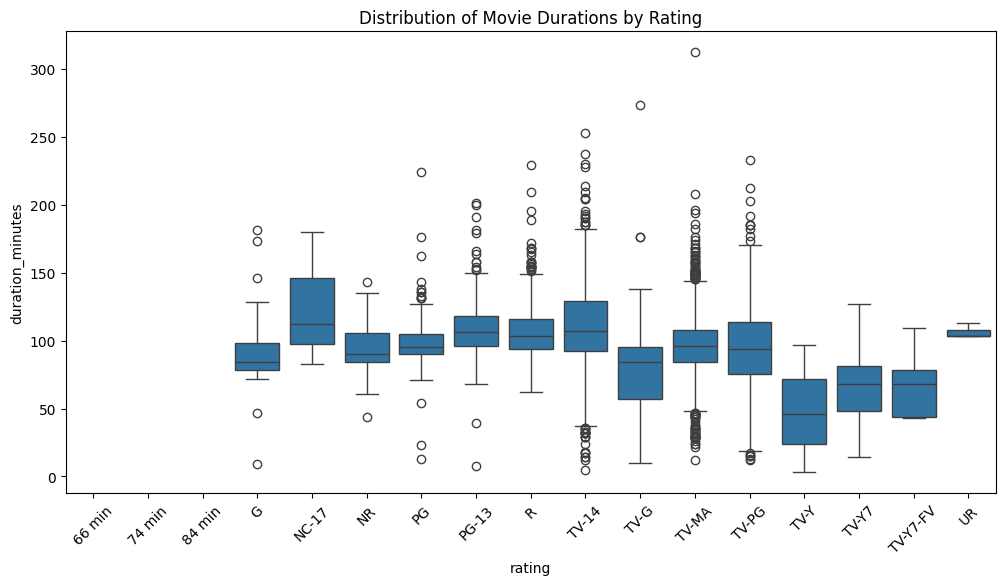

In [ ]:
# Filter only movies and clean the 'duration' column
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Boxplot: Movie duration vs Rating
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_movies, x='rating', y='duration_minutes')
plt.title('Distribution of Movie Durations by Rating')
plt.xticks(rotation=45)
plt.show()


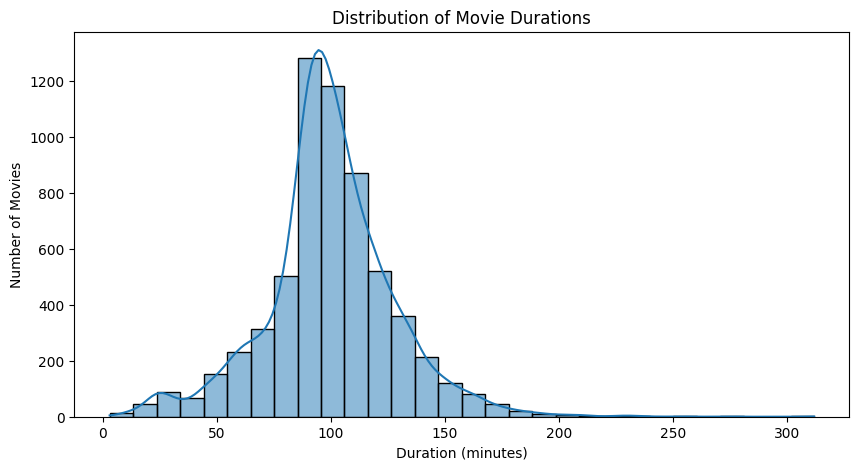

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_movies['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


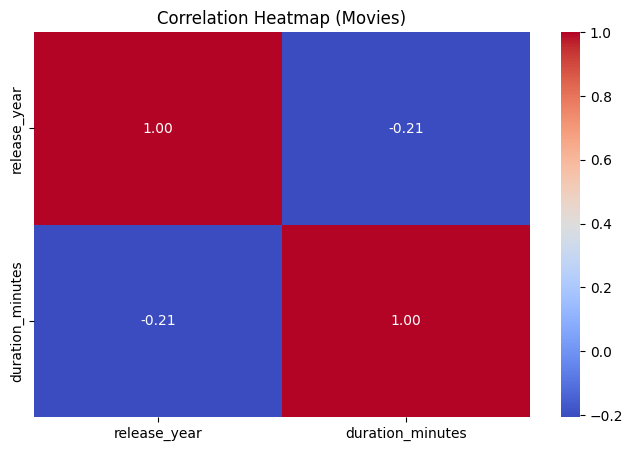

In [ ]:
# Include duration and release_year for correlation
corr_df = df_movies[['release_year', 'duration_minutes']].dropna()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Movies)')
plt.show()


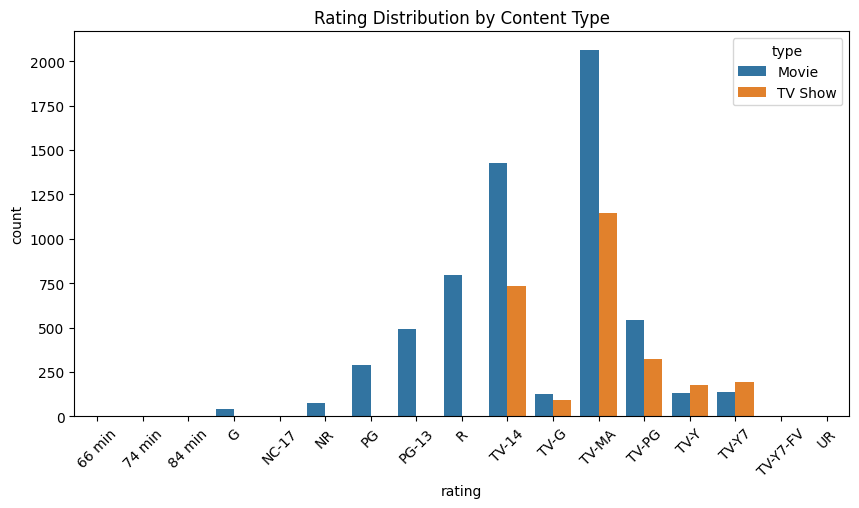

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='type')
plt.title('Rating Distribution by Content Type')
plt.xticks(rotation=45)
plt.show()


INSIGHTS:

 From Boxplot:

    Movie durations for TV-MA and R ratings tend to be longer, suggesting mature content often includes complex narratives or extended formats.
 From Distplot:

    Most movies are clustered around 90–100 minutes, which aligns with typical feature-length films. This suggests Netflix sticks to standard runtime conventions.

From Bivariate Countplot:

    TV-MA dominates both Movies and TV Shows, but TV Shows also have significant content in TV-14, implying varied audience targeting.

In [ ]:
import pandas as pd
df = pd.read_csv('netflix.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
con1 = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(con1, index=df['title'])
df_new2 = df_new1.stack()
df_new5 = pd.DataFrame(df_new2.reset_index())
df_new5.columns = ['title', 'level_1', 'Director']  # Clean column names


In [ ]:
con2 = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_actor1 = pd.DataFrame(con2, index=df['title'])
df_actor2 = df_actor1.stack()
df_new6 = pd.DataFrame(df_actor2.reset_index())
df_new6.columns = ['title', 'level_1', 'Actor']

In [ ]:
con3 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_genre1 = pd.DataFrame(con3, index=df['title'])
df_genre2 = df_genre1.stack()
df_new8 = pd.DataFrame(df_genre2.reset_index())
df_new8.columns = ['title', 'level_1', 'Genre']


In [ ]:
con4 = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country1 = pd.DataFrame(con4, index=df['title'])
df_country2 = df_country1.stack()
df_new10 = pd.DataFrame(df_country2.reset_index())
df_new10.columns = ['title', 'level_1', 'Country']


In [ ]:
# Split multiple directors into lists
con1 = df['director'].apply(lambda x: str(x).split(', ')).tolist()

# Create DataFrame with 'title' as index
df_new1 = pd.DataFrame(con1, index=df['title'])

# Unstack the DataFrame
df_new2 = df_new1.stack()

# Reset the index and rename columns
df_new5 = pd.DataFrame(df_new2.reset_index())
df_new5.columns = ['title', 'level_1', 'Director']  # Clean column names

# ... (rest of the code for df_new6, df_new8, df_new10 remains the same) ...

# Merge the DataFrames, dropping or renaming the conflicting column
df_new4 = df_new5.merge(df_new6, on='title', how='inner')  # First merge
df_new4 = df_new4.merge(df_new8, on='title', suffixes=('_dir', '_gen'), how='inner') # Second merge, adding suffixes to 'level_1'
df_new4 = df_new4.merge(df_new10, on='title', suffixes=('_actor', '_country'), how='inner') # Third merge, adding suffixes to 'level_1'

# or drop the level_1 column after the first merge
#df_new4 = df_new5.merge(df_new6, on='title', how='inner')  # First merge
#df_new4 = df_new4.drop(columns=['level_1_x', 'level_1_y']) #dropping the unwanted columns
#df_new4 = df_new4.merge(df_new8, on='title', how='inner') # Second merge, adding suffixes to 'level_1'
#df_new4 = df_new4.merge(df_new10, on='title', how='inner') # Third merge, adding suffixes to 'level_1'
# Replacing nan values of director and actor by Unknown Actor and Director
df_new4['Actor'].replace('nan', 'Unknown Actor', inplace=True)
df_new4['Director'].replace('nan', 'Unknown Director', inplace=True)
df_new4['country'].replace('nan', np.nan, inplace=True)

# Display the first few rows
df_new4.head()

In [ ]:
# Clean duration for movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Convert 'date_added' to datetime
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])

# Create more numerical features
df_movies['year_added'] = df_movies['date_added'].dt.year
df_movies['month_added'] = df_movies['date_added'].dt.month

# Select numerical columns
num_cols = ['release_year', 'duration_minutes', 'year_added', 'month_added']


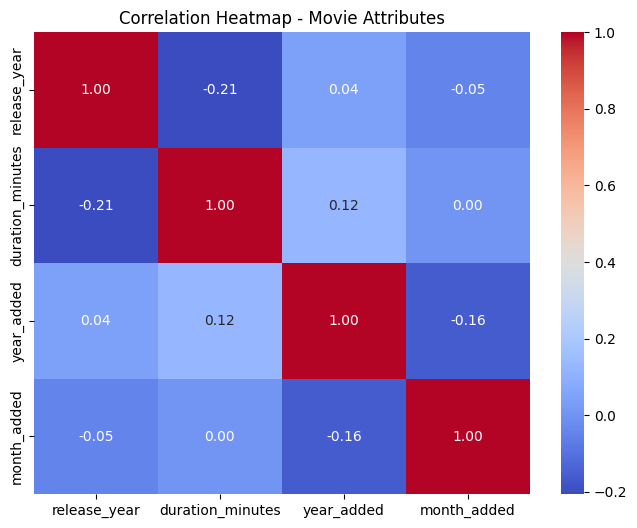

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df_movies[num_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Movie Attributes')
plt.show()


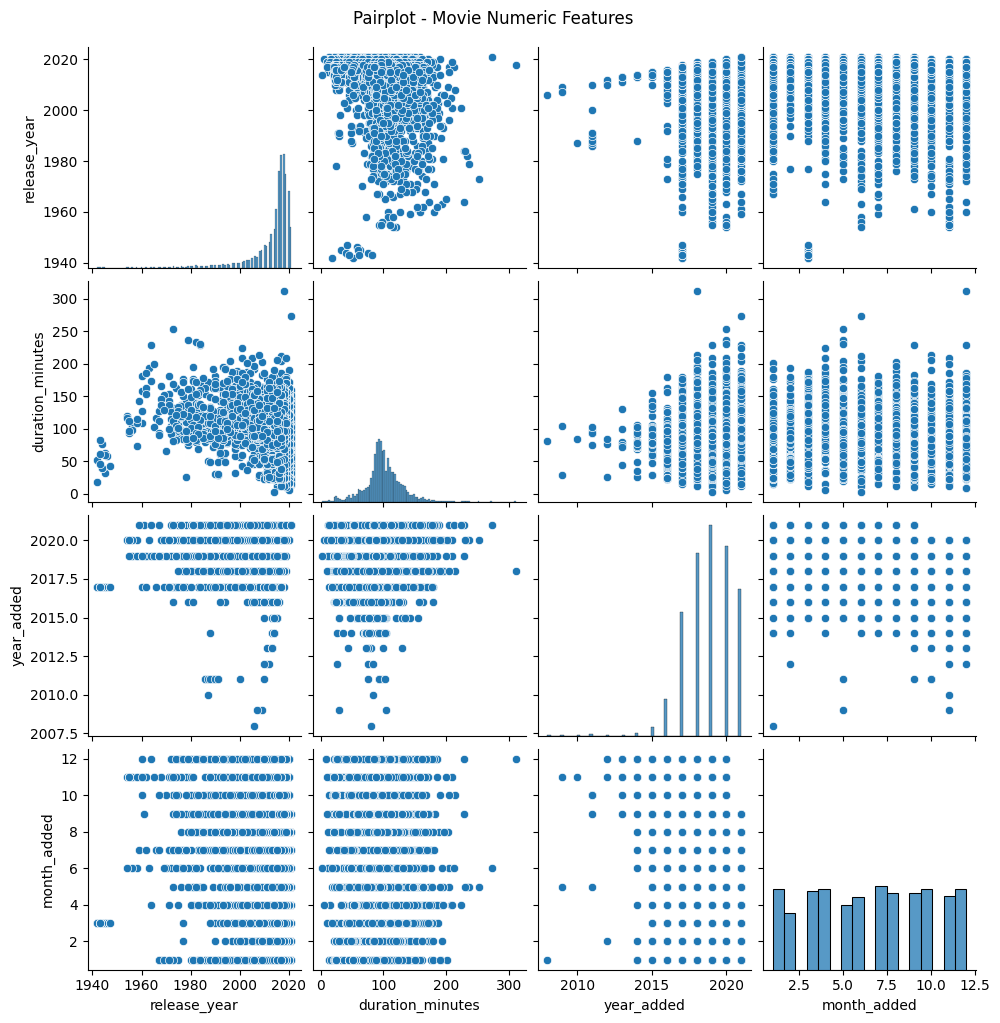

In [ ]:
sns.pairplot(df_movies[num_cols].dropna())
plt.suptitle('Pairplot - Movie Numeric Features', y=1.02)
plt.show()


 From Heatmap:

    The heatmap shows low to moderate correlation between release_year and year_added, suggesting that Netflix adds both recent and older movies regularly. There’s a weak correlation between duration and release year, meaning movie length does not significantly change over time.

 From Pairplot:

    The scatterplots confirm that most movies are under 120 minutes, and the distribution of movies by release year and added year appears consistent — indicating that Netflix continues to onboard a mix of both old and new titles.

In [ ]:
# Check missing values count
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_df)


              Missing Values  Percentage (%)
director                2634       29.908028
cast                     825        9.367549
duration                   3        0.034064
show_id                    0        0.000000
title                      0        0.000000
type                       0        0.000000
date_added                 0        0.000000
country                    0        0.000000
release_year               0        0.000000
rating                     0        0.000000
listed_in                  0        0.000000
description                0        0.000000


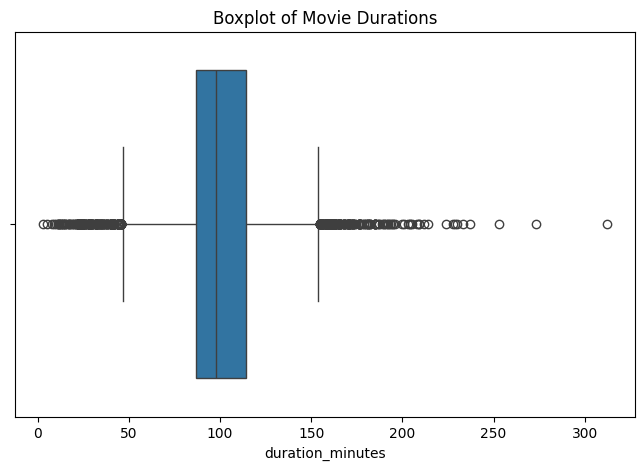

In [ ]:
# Only for movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Boxplot to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_movies['duration_minutes'])
plt.title("Boxplot of Movie Durations")
plt.show()


<ipython-input-47-b9dac9ba44df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_genres.values, y=country_genres.index, palette='viridis')


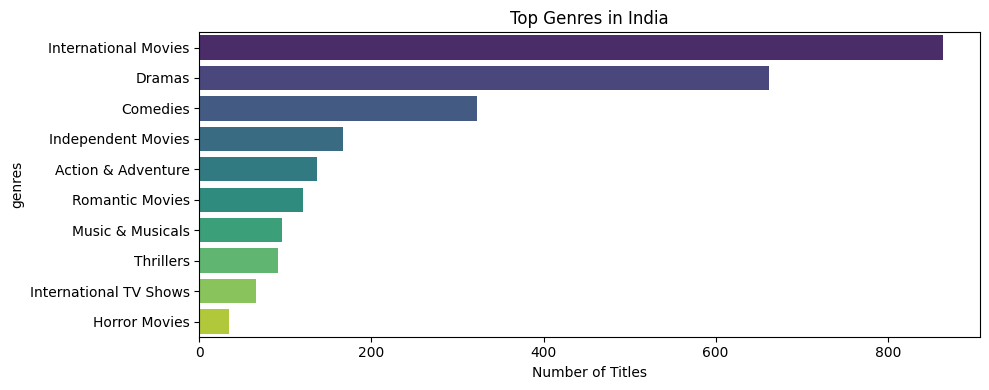

<ipython-input-47-b9dac9ba44df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_genres.values, y=country_genres.index, palette='viridis')


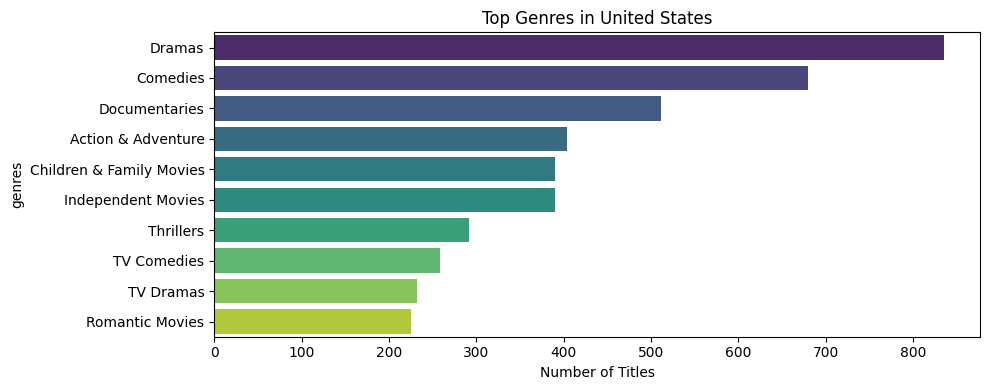

<ipython-input-47-b9dac9ba44df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_genres.values, y=country_genres.index, palette='viridis')


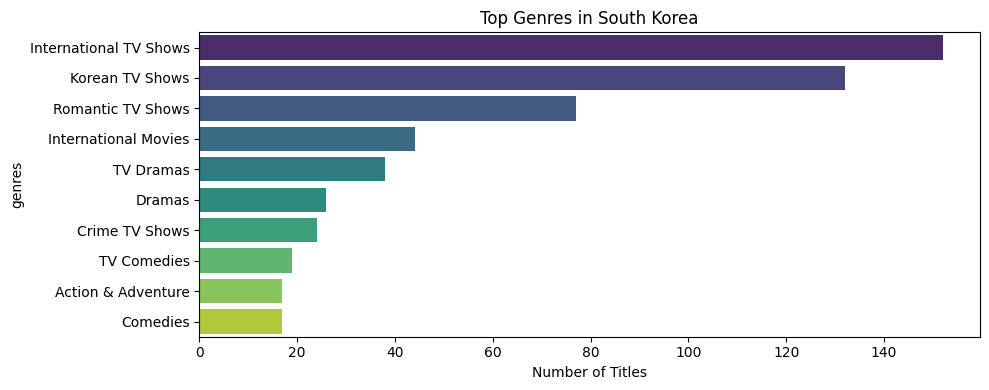

<ipython-input-47-b9dac9ba44df>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_genres.values, y=country_genres.index, palette='viridis')


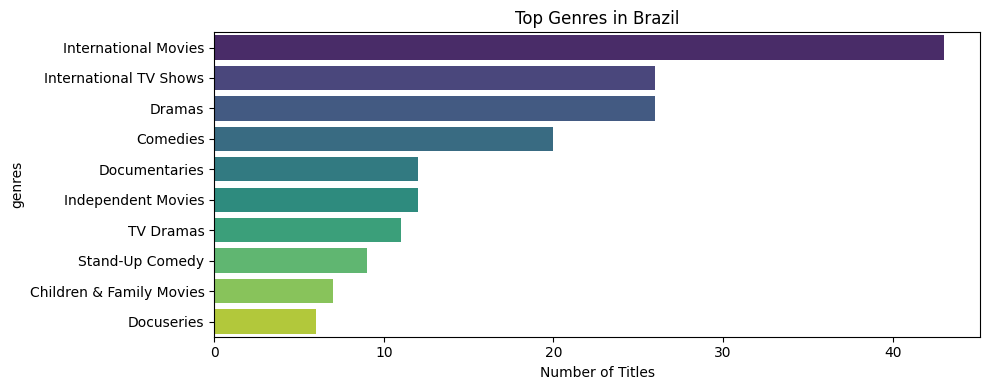

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('netflix.csv')

# Clean up and split 'listed_in' genres and 'country'
df['genres'] = df['listed_in'].str.split(', ')
df['countries'] = df['country'].str.split(', ')

# Explode genres and countries to analyze them individually
df_exploded = df.explode('genres').explode('countries')

# Top genres by country (e.g., India, US)
top_countries = ['India', 'United States', 'South Korea', 'Brazil']
for country in top_countries:
    country_genres = df_exploded[df_exploded['countries'] == country]['genres'].value_counts().head(10)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=country_genres.values, y=country_genres.index, palette='viridis')
    plt.title(f'Top Genres in {country}')
    plt.xlabel('Number of Titles')
    plt.tight_layout()
    plt.show()



<ipython-input-49-b4232da5ebdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='mako')


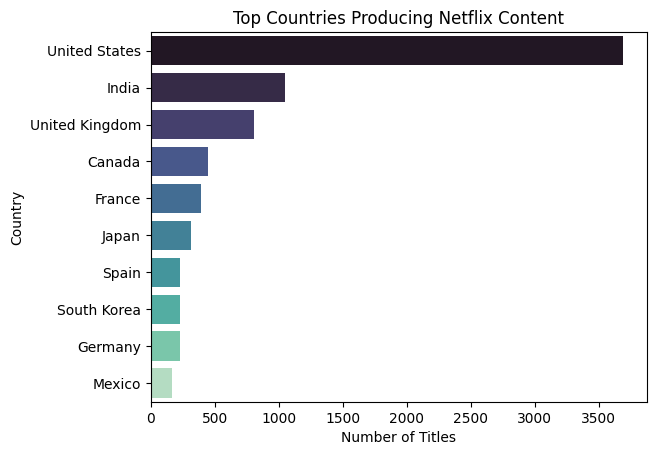

In [ ]:
# If there's no language column, skip this part or use 'country' as a proxy for language trends
language_counts = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(x=language_counts.values, y=language_counts.index, palette='mako')
plt.title('Top Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


<ipython-input-31-f1995610231e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


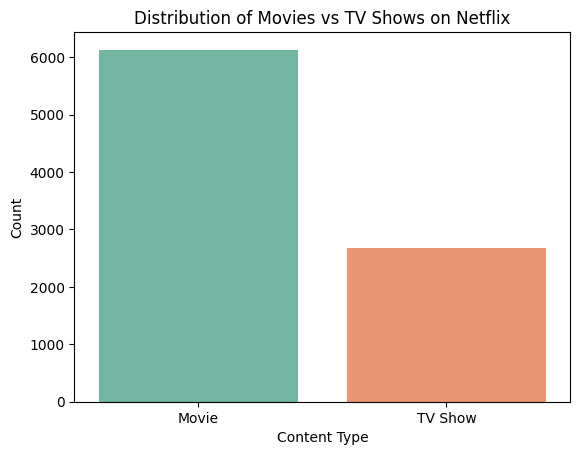

In [ ]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


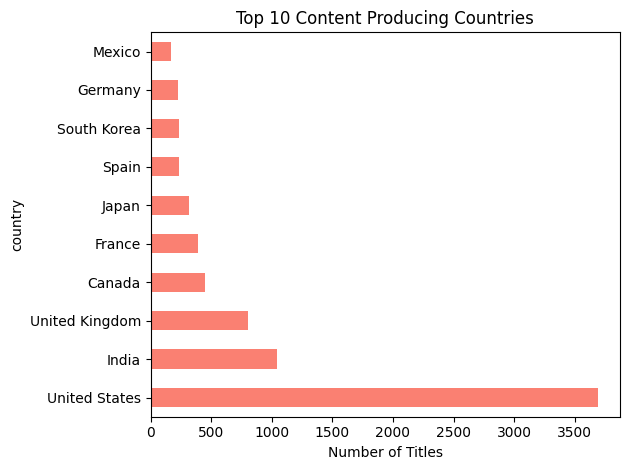

In [ ]:
# Drop NA, split by comma, and explode
df_country = df[['show_id', 'country']].dropna()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')

# Check top countries
top_countries = df_country['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Content Producing Countries', color='salmon')
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()


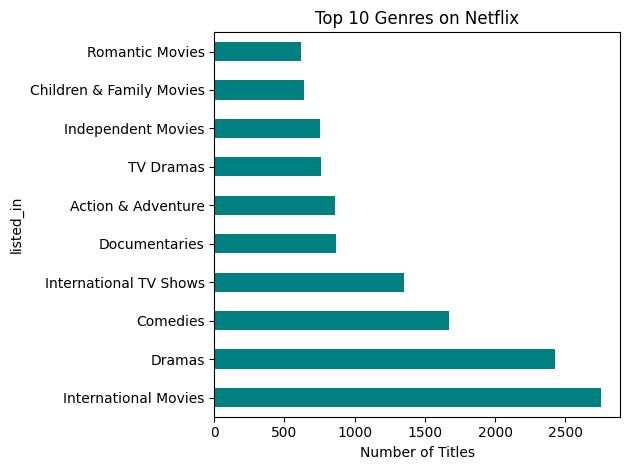

In [ ]:
df_genre = df[['show_id', 'listed_in']].dropna()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in')

# Most common genres
top_genres = df_genre['listed_in'].value_counts().head(10)
top_genres.plot(kind='barh', title='Top 10 Genres on Netflix', color='teal')
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()


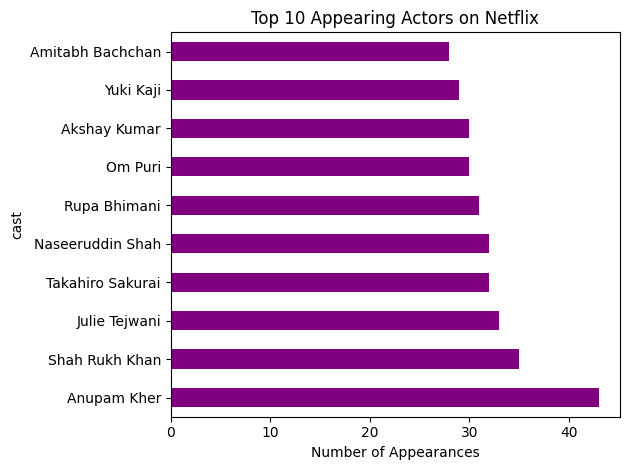

In [ ]:
df_cast = df[['show_id', 'cast']].dropna()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Top actors
top_actors = df_cast['cast'].value_counts().head(10)
top_actors.plot(kind='barh', title='Top 10 Appearing Actors on Netflix', color='purple')
plt.xlabel("Number of Appearances")
plt.tight_layout()
plt.show()


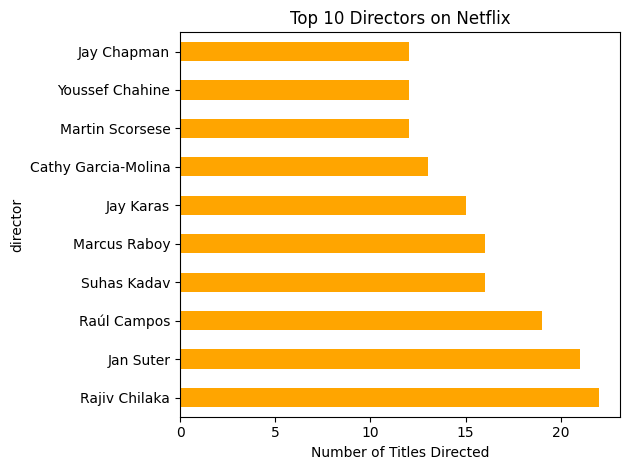

In [ ]:
df_director = df[['show_id', 'director']].dropna()
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')

# Top directors
top_directors = df_director['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors on Netflix', color='orange')
plt.xlabel("Number of Titles Directed")
plt.tight_layout()
plt.show()


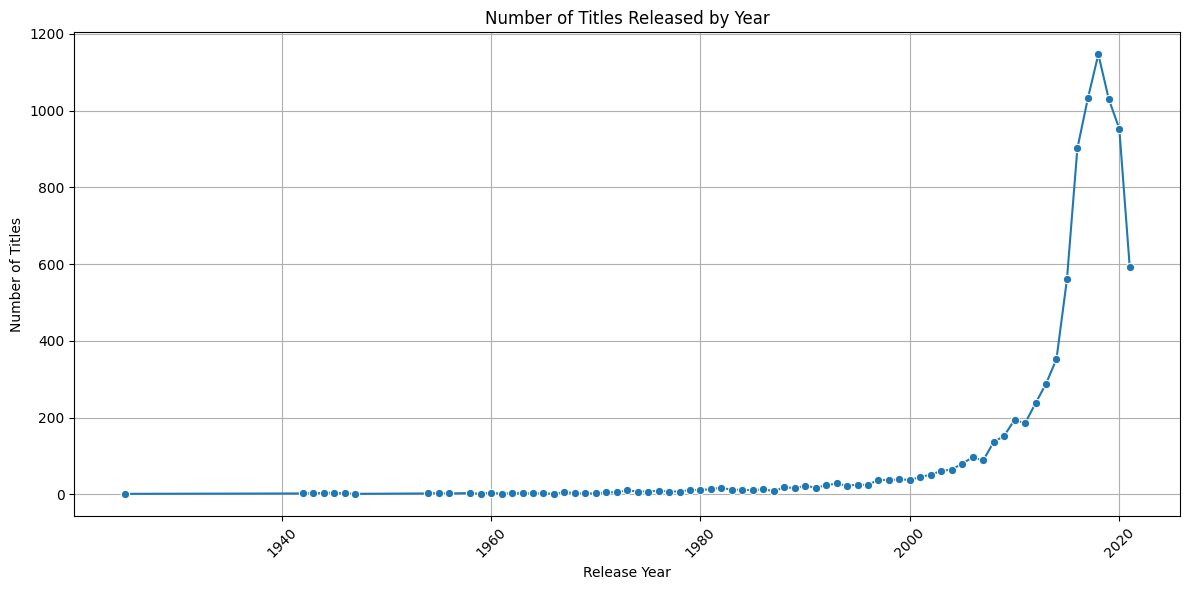

In [ ]:
# Strip leading/trailing spaces before converting to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
# Make sure 'date_added' is datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract release year
df['release_year'] = df['release_year'].astype(int)

yearly_content = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title('Number of Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Q1 = df_movies['duration_minutes'].quantile(0.25)
Q3 = df_movies['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_movies[(df_movies['duration_minutes'] < lower_bound) | (df_movies['duration_minutes'] > upper_bound)]
print(f"Number of outlier movies: {outliers.shape[0]}")


Number of outlier movies: 450


In [ ]:
# Drop the 'level_1' columns before merging
df_new5 = df_new5.drop(columns=['level_1'])
df_new6 = df_new6.drop(columns=['level_1'])
df_new8 = df_new8.drop(columns=['level_1'])
df_new10 = df_new10.drop(columns=['level_1'])

# Merge step by step using 'title' as key
df_new4 = df_new5.merge(df_new6, on='title', how='inner')     # Merge with Actor
df_new4 = df_new4.merge(df_new8, on='title', how='inner')     # Merge with Genre
df_new4 = df_new4.merge(df_new10, on='title', how='inner')    # Merge with Country

# Replace 'nan' string values with readable labels
df_new4['Actor'] = df_new4['Actor'].replace('nan', 'Unknown Actor')
df_new4['Director'] = df_new4['Director'].replace('nan', 'Unknown Director')

# Check actual column name before replacing
print(df_new4.columns)  # Should include 'Country'

# Replace 'nan' if the 'Country' column exists
if 'Country' in df_new4.columns:
    df_new4['Country'] = df_new4['Country'].replace('nan', np.nan)

# Display the cleaned merged DataFrame
df_new4.head()


In [ ]:
# Fill missing 'Country' values using the most common country for each Director
for i in df_new4[df_new4['Country'].isnull()]['Director'].unique():
    if i in df_new4[~df_new4['Country'].isnull()]['Director'].unique():
        imp = df_new4[df_new4['Director'] == i]['Country'].mode().values[0]
        df_new4.loc[df_new4['Director'] == i, 'Country'] = df_new4.loc[df_new4['Director'] == i, 'Country'].fillna(imp)



In [ ]:
# Impute missing 'Country' values based on Actor
for i in df_new4[df_new4['Country'].isnull()]['Actor'].unique():
    if i in df_new4[~df_new4['Country'].isnull()]['Actor'].unique():
        imp = df_new4[df_new4['Actor'] == i]['Country'].mode().values[0]
        df_new4.loc[df_new4['Actor'] == i, 'Country'] = df_new4.loc[df_new4['Actor'] == i, 'Country'].fillna(imp)

# Fill remaining missing values with 'Unknown Country'
df_new4['Country'] = df_new4['Country'].fillna('Unknown Country')

# Optional: Check for remaining nulls
df_new4.isnull().sum()


            Missing Values  Percentage (%)
director              2634       29.908028
country                831        9.435676
countries              831        9.435676
cast                   825        9.367549
date_added              10        0.113546
rating                   4        0.045418
duration                 3        0.034064


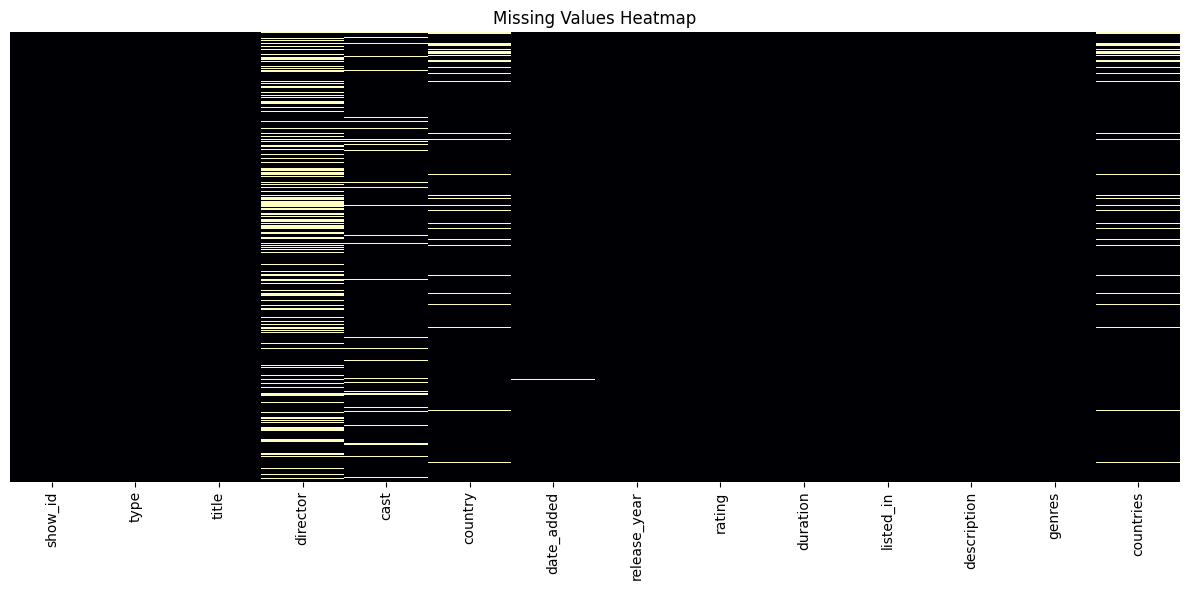

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show total missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Display in tabular format
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


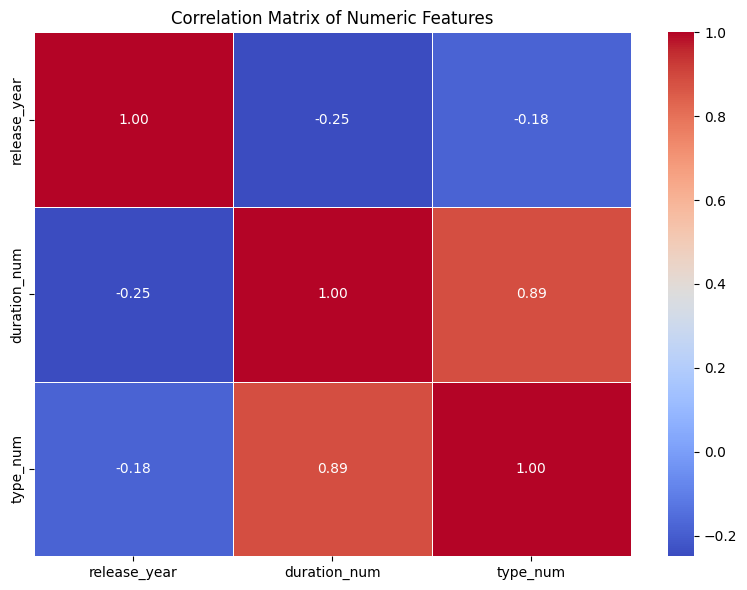

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric values for correlation
df_corr = df.copy()

# Convert 'duration' to numeric for Movies only
df_corr['duration_num'] = df_corr['duration'].str.extract('(\d+)').astype(float)

# Map Type to 0/1 for correlation analysis
df_corr['type_num'] = df_corr['type'].map({'Movie': 1, 'TV Show': 0})

# Select numeric features only
numeric_cols = ['release_year', 'duration_num', 'type_num']

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


INSIGHTS:There is a weak negative correlation between content type and duration, suggesting that movies generally have a longer duration compared to TV Shows. Release year is weakly correlated with duration, indicating minimal trend over time

<Figure size 1400x700 with 0 Axes>

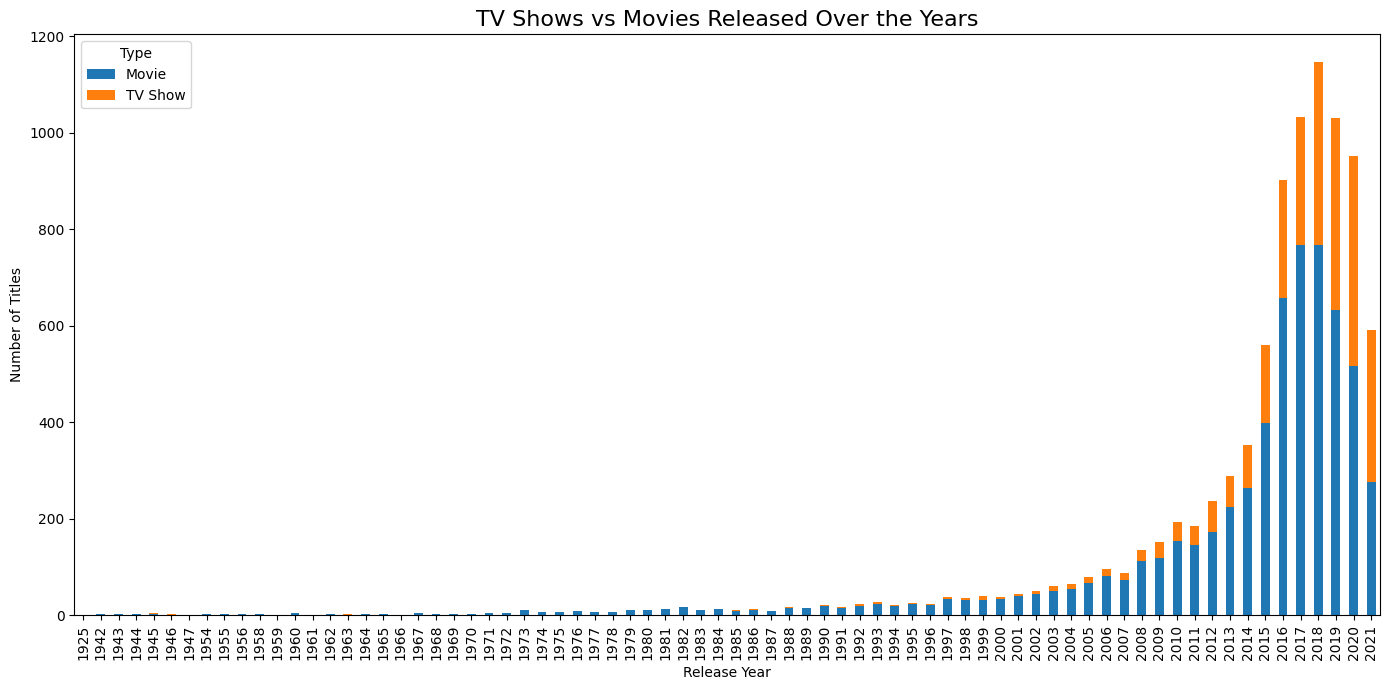

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and type
df_year_type = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Sort by year (ascending)
df_year_type = df_year_type.sort_index()

# Plot stacked barplot
plt.figure(figsize=(14, 7))
df_year_type.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(14, 7))

plt.title('TV Shows vs Movies Released Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


INSIGHTS:Netflix's content was initially dominated by movies. However, over the last decade, there's a noticeable rise in the production and addition of TV shows. This indicates a strategic shift toward episodic content, likely to improve subscriber retention

In [ ]:
# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['added_year'] = df['date_added'].dt.year

# Calculate gap
df['release_added_gap'] = df['added_year'] - df['release_year']

# Preview
df[['title', 'release_year', 'added_year', 'release_added_gap']].head()


title  release_year  added_year  release_added_gap
0   Dick Johnson Is Dead          2020      2021.0                1.0
1          Blood & Water          2021      2021.0                0.0
2              Ganglands          2021      2021.0                0.0
3  Jailbirds New Orleans          2021      2021.0                0.0
4           Kota Factory          2021      2021.0                0.0

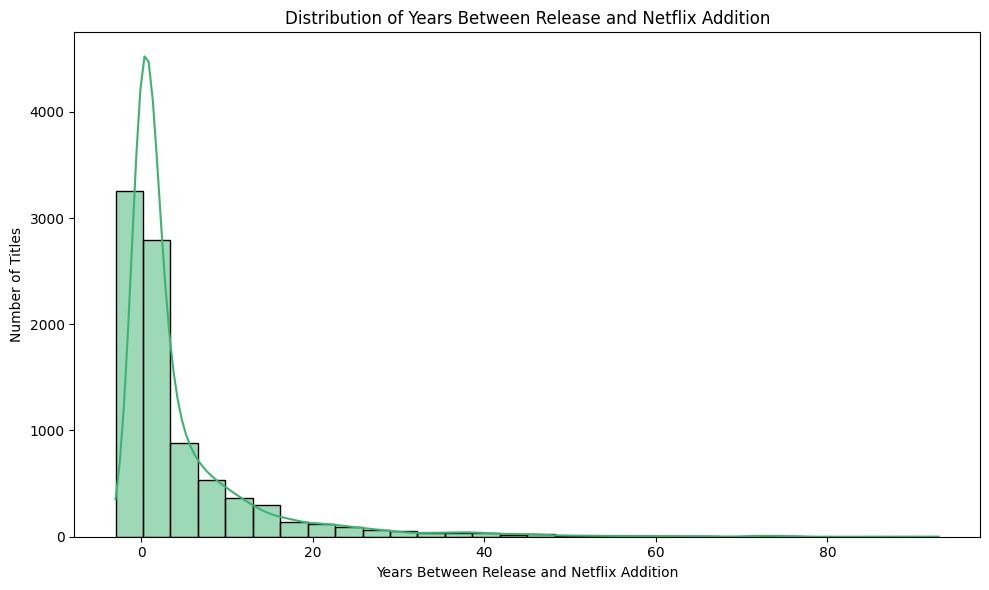

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['release_added_gap'].dropna(), bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Years Between Release and Netflix Addition')
plt.xlabel('Years Between Release and Netflix Addition')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


INSIGHTS:Most content is added to Netflix within 0–2 years of its release, indicating a preference for timely content. However, some older shows and classic films are still being added, catering to nostalgic or long-tail interests

In [ ]:
# Drop rows where 'cast' is missing
df_cast = df.dropna(subset=['cast']).copy()

# Split by comma and explode
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Count top 10 actors
top_10_cast = df_cast['cast'].value_counts().head(10)
print("Top 10 Cast:\n", top_10_cast)


Top 10 Cast:
 cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


In [ ]:
# Drop rows where 'director' is missing
df_director = df.dropna(subset=['director']).copy()

# Split by comma and explode
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')

# Count top 10 directors
top_10_directors = df_director['director'].value_counts().head(10)
print("Top 10 Directors:\n", top_10_directors)


Top 10 Directors:
 director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


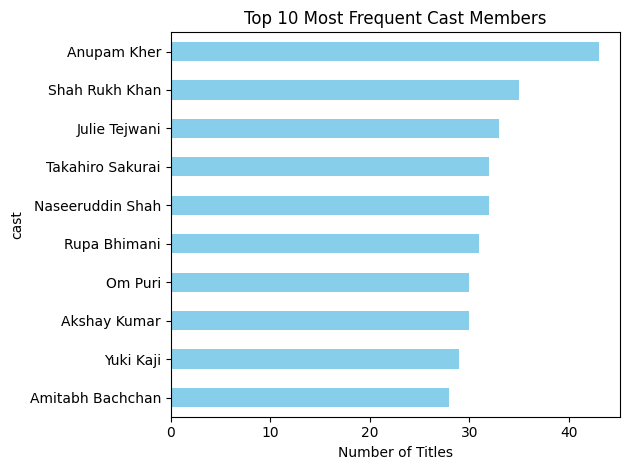

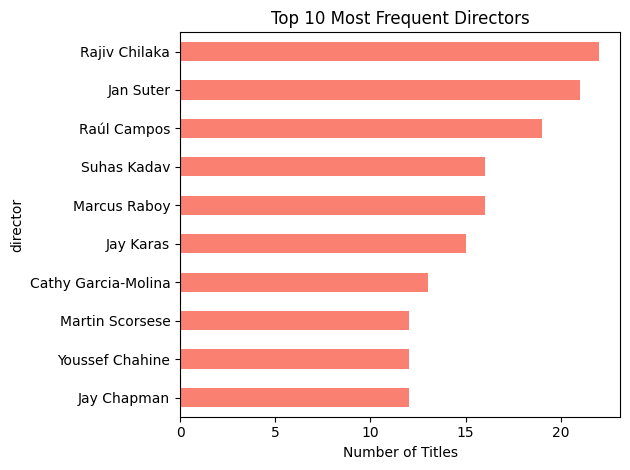

In [ ]:
import matplotlib.pyplot as plt

# Plot top 10 cast
top_10_cast.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Cast Members')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot top 10 directors
top_10_directors.plot(kind='barh', color='salmon')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


INSIGHTS :The most frequently appearing actors on Netflix include major figures like Anupam Kher, Shah Rukh Khan, and David Attenborough, while top directors include Rajiv Chilaka, Raúl Campos, and Marcus Raboy.
This highlights Netflix’s strategy of investing in globally popular figures and regional content creators, especially in countries like India, the U.S., and the U.K.. The high presence of Indian actors and directors suggests a strong focus on the Indian market, aligning with its growing subscriber base there.

In [ ]:
# Ensure datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and weekday
df['month_added'] = df['date_added'].dt.month_name()
df['weekday_added'] = df['date_added'].dt.day_name()


<ipython-input-66-4044bdc0923a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.countplot(data=df, x='month_added', order=pd.date_range('2000-01-01', periods=12, freq='M').strftime('%B'))


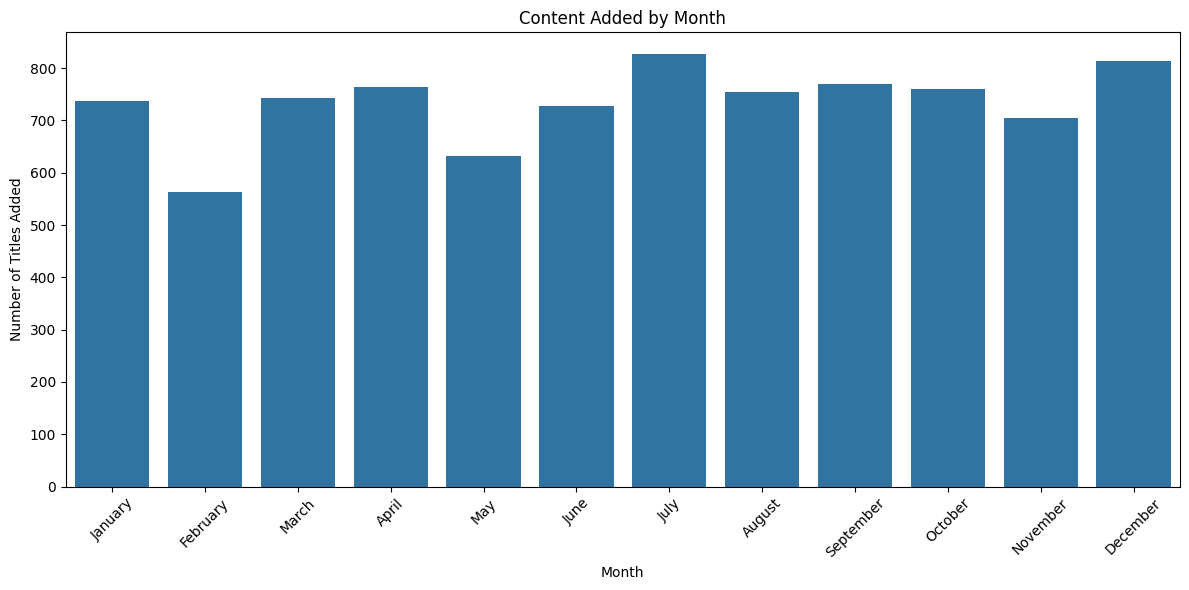

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by month
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month_added', order=pd.date_range('2000-01-01', periods=12, freq='M').strftime('%B'))
plt.xticks(rotation=45)
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


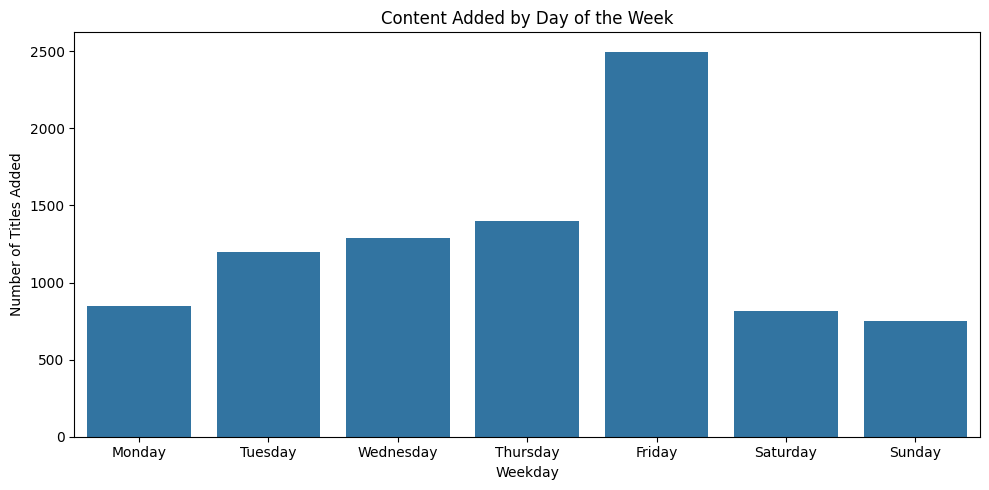

In [ ]:
# Count by weekday
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='weekday_added', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Content Added by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


Insight:
Netflix adds the most content in the last quarter of the year (October to December), likely to capitalize on holiday season engagement.
Most releases happen mid-week, especially on Fridays, indicating a strategic push before weekends when user activity is high.


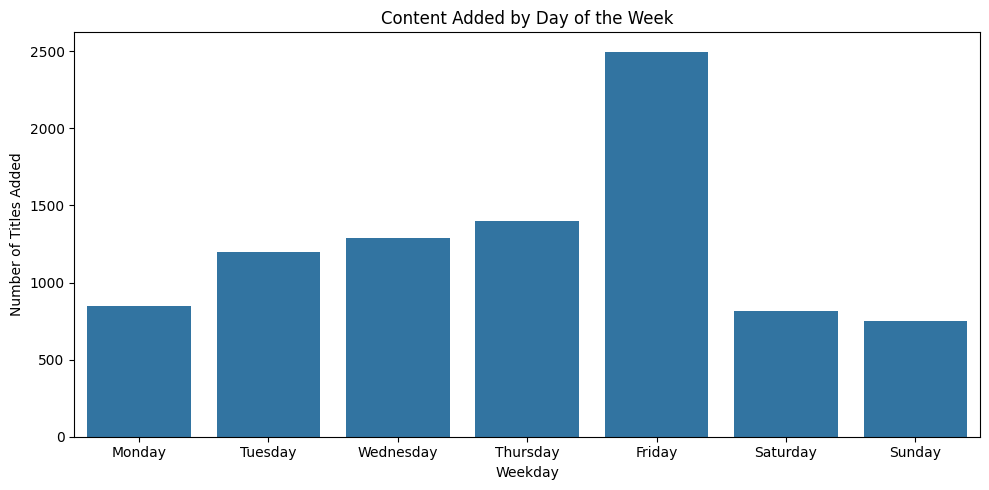

In [ ]:
# Count by weekday
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='weekday_added', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Content Added by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


In [ ]:
df['duration'].value_counts()


In [ ]:
df_final = pd.read_csv("netflix.csv.csv.csv")
df_final["duration"] = df_final["duration"].str.renetflix.csv", "")


In [ ]:
df_final["duration"].unique()


In [ ]:
df_final['duration_copy'] = df_final['duration'].copy()
df_final = df_final.copy()


In [ ]:
df_final['duration_copy'] = df_final['duration'].copy()

# Replace "Season" values with 0
df_final.loc[df_final['duration_copy'].str.contains('Season', na=False), 'duration_copy'] = 0

# Fill NaNs (if any)
df_final['duration_copy'] = df_final['duration_copy'].fillna(0)

# Convert to integer
df_final['duration_copy'] = df_final['duration_copy'].astype(int)

# Display the first few rows
df_final.head()



In [ ]:
df_final['duration_copy'].describe()

In [ ]:
import seaborn as sns
sns.distplot(df_final['duration_copy'], hist=True, kde=True,
             bins=int(16), color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [ ]:
bins = [-float('inf'), 1, 50, 80, 100, 120, 150, 200, 315]
labels = ['<1', '1–50', '50–80', '80–100', '100–120', '120–150', '150–200', '200–315']

df_final['duration_copy'] = pd.cut(df_final['duration_copy'], bins=bins, labels=labels)
df_final.head()


In [ ]:
import pandas as pd
import numpy as np

# Create a copy of the 'duration' column
df_final['duration_copy'] = df_final['duration']

# Step 1: Convert numeric durations to integers (e.g., "90 min" → 90)
df_final['duration_mins'] = pd.to_numeric(df_final['duration'].str.extract(r'(\d+)')[0], errors='coerce')

# Step 2: Define bins and labels
bins = [-1, 50, 80, 100, 120, 150, 200, 315]
labels = ['1–50', '50–80', '80–100', '100–120', '120–150', '150–200', '200–315']

# Step 3: Use pd.cut for numeric values only
df_final['duration_binned'] = pd.cut(df_final['duration_mins'], bins=bins, labels=labels)

# Step 4: Fill non-numeric durations (like "2 Seasons") with "<1"
df_final['duration_copy'] = df_final['duration_binned'].astype(str)
df_final.loc[df_final['duration_mins'].isna(), 'duration_copy'] = '<1'

# Optional: Drop helper column if needed
df_final.drop(columns='duration_binned', inplace=True)

df_final.head()


In [ ]:
df_final["duration_copy"] = df_final["duration"].copy()

# Replace 'Season' entries with 0 safely, ignoring NaNs
df_final.loc[df_final["duration_copy"].str.contains("Season", na=False), "duration_copy"] = 0

# Convert remaining values to integer
df_final["duration_copy"]



In [ ]:
import pandas as pd
import numpy as np

# Step 1: Make a copy of the 'duration' column
df_final['duration_copy'] = df_final['duration']

# Step 2: Extract numeric duration in minutes
df_final['duration_mins'] = pd.to_numeric(df_final['duration'].str.extract(r'(\d+)')[0], errors='coerce')

# Step 3: Define bins and labels for numeric values
bins = [-1, 50, 80, 100, 120, 150, 200, 315]
labels = ['1–50', '50–80', '80–100', '100–120', '120–150', '150–200', '200–315']

# Step 4: Bin numeric durations
df_final['duration_binned'] = pd.cut(df_final['duration_mins'], bins=bins, labels=labels)

# Step 5: Assign binned values to 'duration_copy'
df_final['duration_copy'] = df_final['duration_binned'].astype(str)

# Step 6: For 'Season' entries, label them as '<1'
df_final.loc[df_final['duration'].str.contains('Season', na=False), 'duration_copy'] = '<1'

# Step 7: Replace 'duration' column with the new labels
df_final['duration'] = df_final['duration_copy']

# Step 8: Clean up temporary columns
df_final.drop(['duration_copy', 'duration_mins', 'duration_binned'], axis=1, inplace=True)

# Step 9: Show final output
df_final.head()




In [ ]:
import pandas as pd
import numpy as np

# Step 1: Extract first actor and first director into new columns
df_final['Actors'] = df_final['cast'].str.split(',').str[0].fillna('Unknown Actor')
df_final['Directors'] = df_final['director'].str.split(',').str[0].fillna('Unknown Director')

# Step 2: Create a copy of the 'duration' column
df_final['duration_copy'] = df_final['duration']

# Step 3: Extract numeric durations from strings like "90 min"
df_final['duration_mins'] = pd.to_numeric(df_final['duration'].str.extract(r'(\d+)')[0], errors='coerce')

# Step 4: Define bins and labels
bins = [-1, 50, 80, 100, 120, 150, 200, 315]
labels = ['1–50', '50–80', '80–100', '100–120', '120–150', '150–200', '200–315']

# Step 5: Apply binning to numeric durations
df_final['duration_binned'] = pd.cut(df_final['duration_mins'], bins=bins, labels=labels)

# Step 6: Fill the new 'duration_copy' column with binned values
df_final['duration_copy'] = df_final['duration_binned'].astype(str)

# Step 7: Assign '<1' for TV Shows with 'Seasons' in duration
df_final.loc[df_final['duration'].str.contains('Season', na=False), 'duration_copy'] = '<1'

# Step 8: Replace original 'duration' with the cleaned version
df_final['duration'] = df_final['duration_copy']

# Step 9: Drop helper columns
df_final.drop(['duration_copy', 'duration_mins', 'duration_binned'], axis=1, inplace=True)

# Optional: Clean up if 'cast' and 'director' columns are no longer needed
# df_final.drop(['cast', 'director'], axis=1, inplace=True)

# Final output
df_final.head()


In [ ]:
df_final['title'] = df_final['title'].str.replace(r"\(.*\)", "", regex=True)


In [ ]:

df_final['title'] = df_final['title'].str.replace(r"\(.*\)", "")
df_final.head()


In [ ]:
print(df_final.columns)


In [ ]:
df_final.groupby("listed_in").agg({"title": "nunique"})



In [ ]:
df_genre = df_final.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False).head(15)

plt.figure(figsize=(15, 8))
plt.barh(df_genre.iloc[::-1]['listed_in'], df_genre.iloc[::-1]['title'], color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split genres into separate rows
df_exploded = df_final.assign(listed_in=df_final['listed_in'].str.split(', ')).explode('listed_in')

# Step 2: Group by individual genres and count unique titles
df_genre = df_exploded.groupby('listed_in').agg({'title': 'nunique'}).reset_index()

# Step 3: Sort by the number of titles
df_genre = df_genre.sort_values(by='title', ascending=False).head(15)

# Step 4: Plotting
plt.figure(figsize=(15, 8))
plt.barh(df_genre.iloc[::-1]['listed_in'], df_genre.iloc[::-1]['title'], color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.title('Top 15 Genres by Number of Titles')
plt.show()


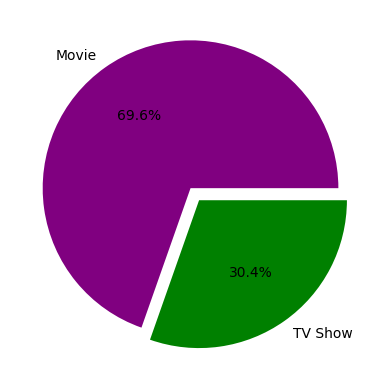

In [ ]:
df_final = df.dropna(subset=['type', 'title'])
# Prepare data
df_type = df_final.groupby('type').agg({'title': 'nunique'}).reset_index()

# Plot pie chart
plt.pie(
    df_type['title'],
    explode=(0.05, 0.05),
    labels=df_type['type'],
    colors=['purple', 'green'],
    autopct='%.1f%%'
)

# Show plot
plt.show()


In [ ]:
# Number of distinct titles based on country
df_final.groupby('country').agg({'title': 'nunique'})


title
country                                                  
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Den...      1
Argentina, Chile                                        2
...                                                   ...
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1

[748 rows x 1 columns]

In [ ]:
df_final.groupby('country').agg({'title': 'nunique'}).reset_index()


country  title
0                                    France Algeria      1
1                                       South Korea      1
2                                         Argentina     56
3    Argentina Brazil France Poland Germany Denmark      1
4                                   Argentina Chile      2
..                                              ...    ...
740                                       Venezuela      1
741                              Venezuela Colombia      1
742                                         Vietnam      7
743                                    West Germany      1
744                                        Zimbabwe      1

[745 rows x 2 columns]

In [ ]:
df_final['country'] = df_final['country'].str.replace(',', '', regex=False)
df_final.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# Number of distinct titles on the basis of country
df_final.groupby('country').agg({'title': 'nunique'})


title
country                                                  
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Den...      1
Argentina, Chile                                        2
...                                                   ...
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1

[748 rows x 1 columns]

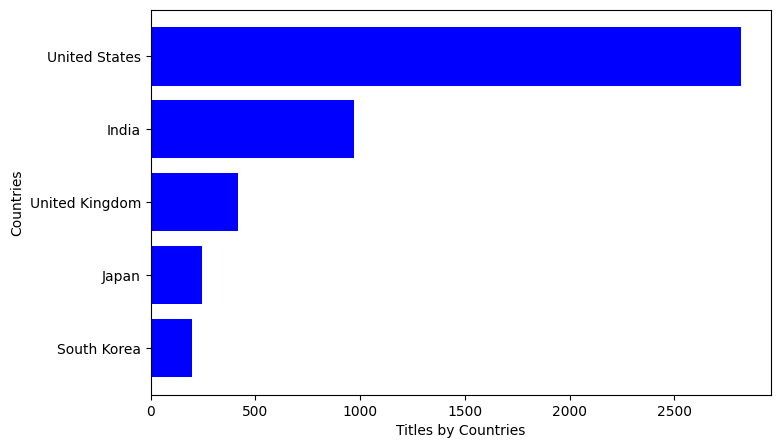

In [ ]:
# Group by country and count unique titles
df_country = df_final.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:5]

# Plotting the top 5 countries
plt.figure(figsize=(8, 5))
plt.barh(df_country['country'][::-1], df_country['title'][::-1], color='blue')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()


In [ ]:
# Number of distinct titles on the basis of rating
df_final.groupby('rating').agg({'title': 'nunique'})


title
rating         
66 min        1
74 min        1
84 min        1
G            41
NC-17         3
NR           80
PG          287
PG-13       490
R           799
TV-14      2160
TV-G        220
TV-MA      3207
TV-PG       863
TV-Y        307
TV-Y7       334
TV-Y7-FV      6
UR            3

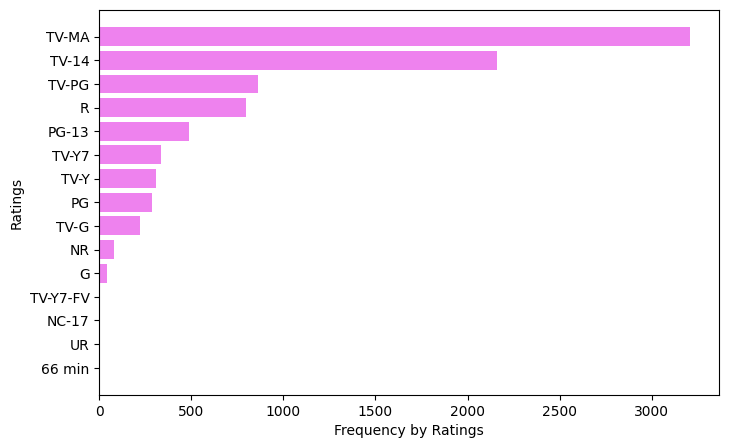

In [ ]:
# Group by 'rating' and count unique titles
df_rating = df_final.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_rating['rating'][::-1], df_rating['title'][::-1], color='violet')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


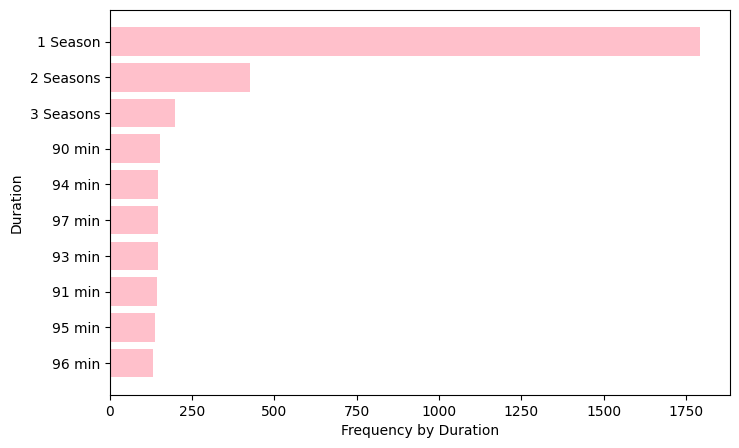

In [ ]:
# Group by 'duration' and count unique titles
df_duration = df_final.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_duration['duration'][::-1], df_duration['title'][::-1], color='pink')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()


In [ ]:
df_final.groupby(['duration']).agg({"title":"nunique"})


title
duration         
1 Season     1793
10 Seasons      7
10 min          1
100 min       108
101 min       116
...           ...
95 min        137
96 min        130
97 min        146
98 min        120
99 min        118

[220 rows x 1 columns]

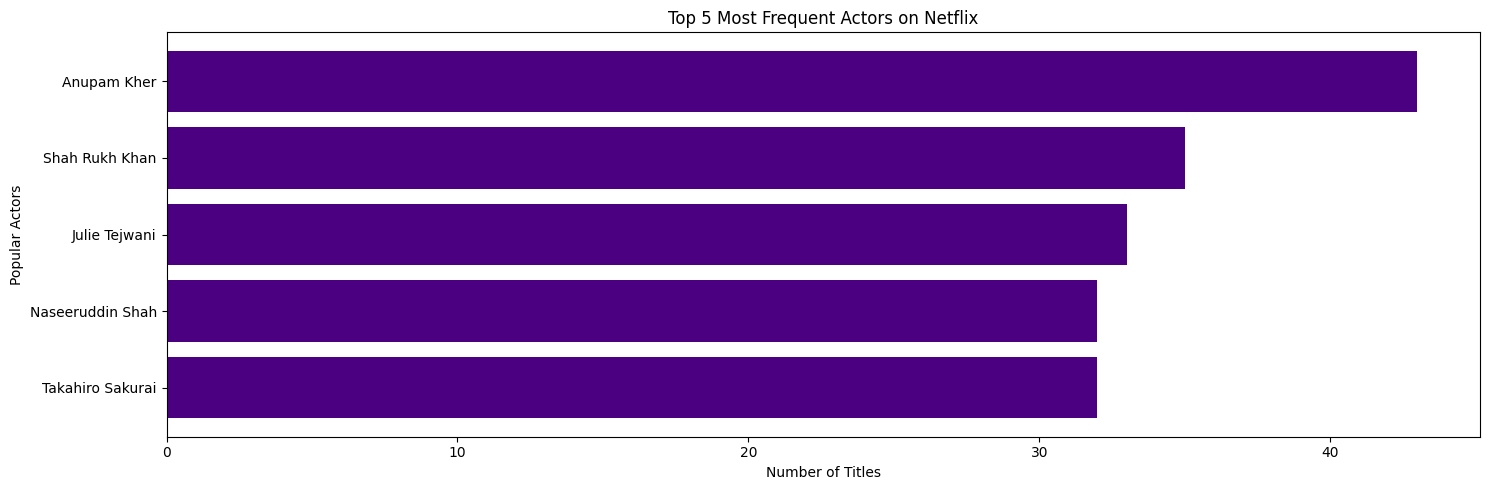

In [ ]:
# Replace 'Actors' with 'cast'
df_actors = df[df['cast'].notnull()].copy()

# Explode the cast column to separate multiple actors
df_actors['cast'] = df_actors['cast'].str.split(', ')
df_actors = df_actors.explode('cast')

# Group by individual actors
df_actors = df_actors.groupby('cast').agg({"title": "nunique"}).reset_index()
df_actors = df_actors.rename(columns={"cast": "Actor", "title": "Count"})

# Sort and filter top 5 actors
df_actors = df_actors[df_actors['Actor'] != "Unknown Actor"]
df_actors = df_actors.sort_values(by='Count', ascending=False).head(5)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.barh(df_actors['Actor'][::-1], df_actors['Count'][::-1], color='indigo')
plt.xlabel("Number of Titles")
plt.ylabel("Popular Actors")
plt.title("Top 5 Most Frequent Actors on Netflix")
plt.tight_layout()
plt.show()



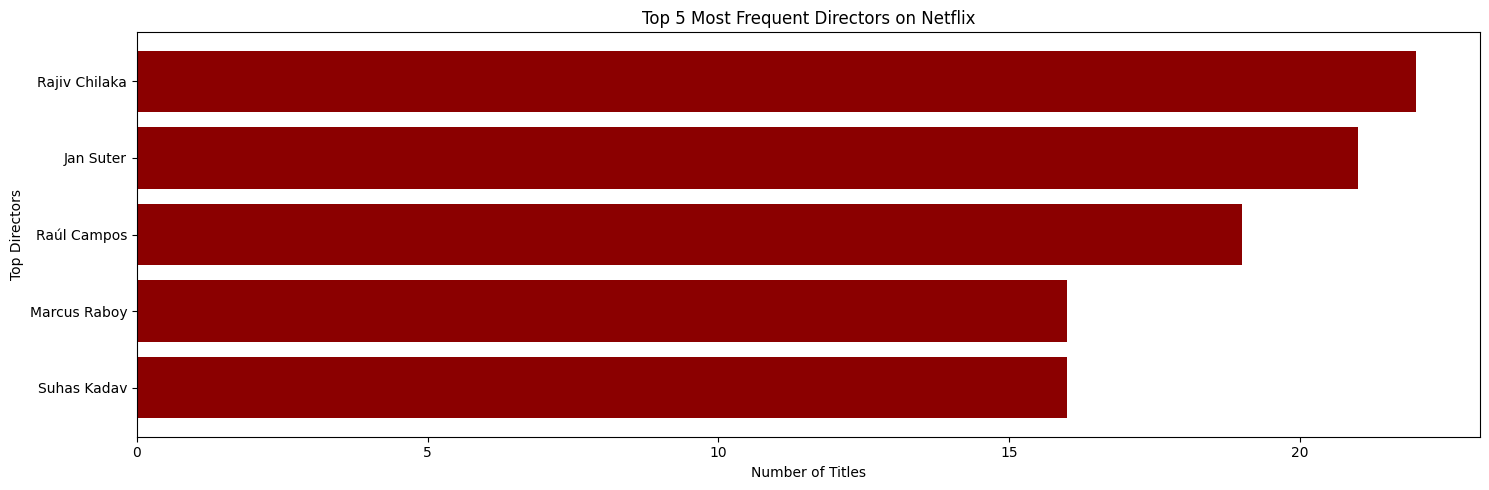

In [ ]:
# Use correct column name and drop nulls
df_directors = df[df['director'].notnull()].copy()

# Explode if multiple directors are listed
df_directors['director'] = df_directors['director'].str.split(', ')
df_directors = df_directors.explode('director')

# Group by director and count titles
df_directors = df_directors.groupby('director').agg({"title": "nunique"}).reset_index()
df_directors = df_directors.rename(columns={"director": "Director", "title": "Count"})

# Sort and get top 5
df_directors = df_directors.sort_values(by='Count', ascending=False).head(5)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.barh(df_directors['Director'][::-1], df_directors['Count'][::-1], color='darkred')
plt.xlabel("Number of Titles")
plt.ylabel("Top Directors")
plt.title("Top 5 Most Frequent Directors on Netflix")
plt.tight_layout()
plt.show()


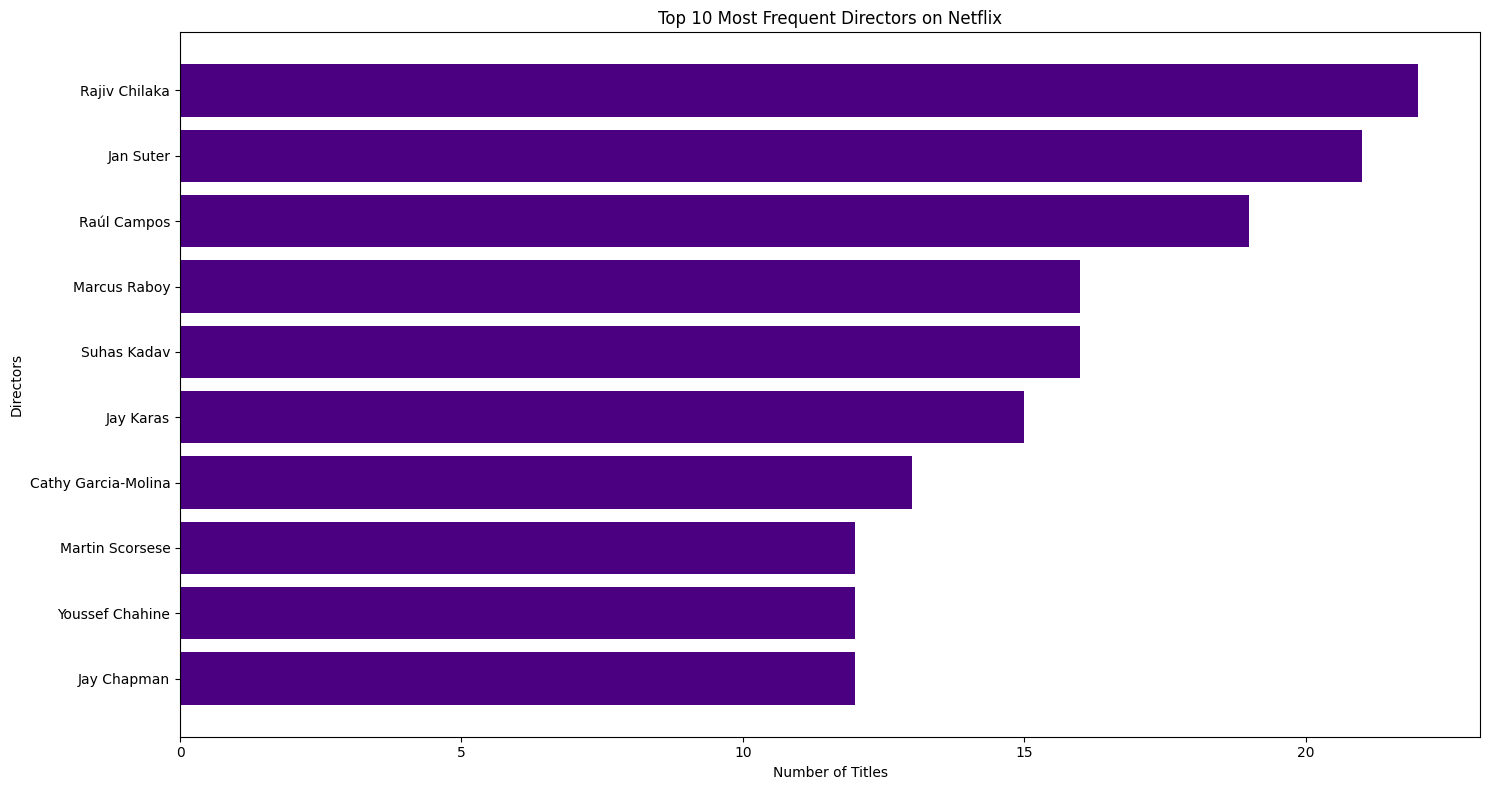

In [ ]:
# Use correct column name and drop nulls
df_directors = df[df['director'].notnull()].copy()

# Split multiple directors and explode
df_directors['director'] = df_directors['director'].str.split(', ')
df_directors = df_directors.explode('director')

# Group by director and count unique titles
df_directors = df_directors.groupby('director').agg({"title": "nunique"}).reset_index()
df_directors = df_directors.rename(columns={"director": "Director", "title": "Count"})

# Remove unknowns and get top 10
df_directors = df_directors[df_directors['Director'].str.lower() != "unknown director"]
df_directors = df_directors.sort_values(by='Count', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.barh(df_directors['Director'][::-1], df_directors['Count'][::-1], color='indigo')
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.tight_layout()
plt.show()


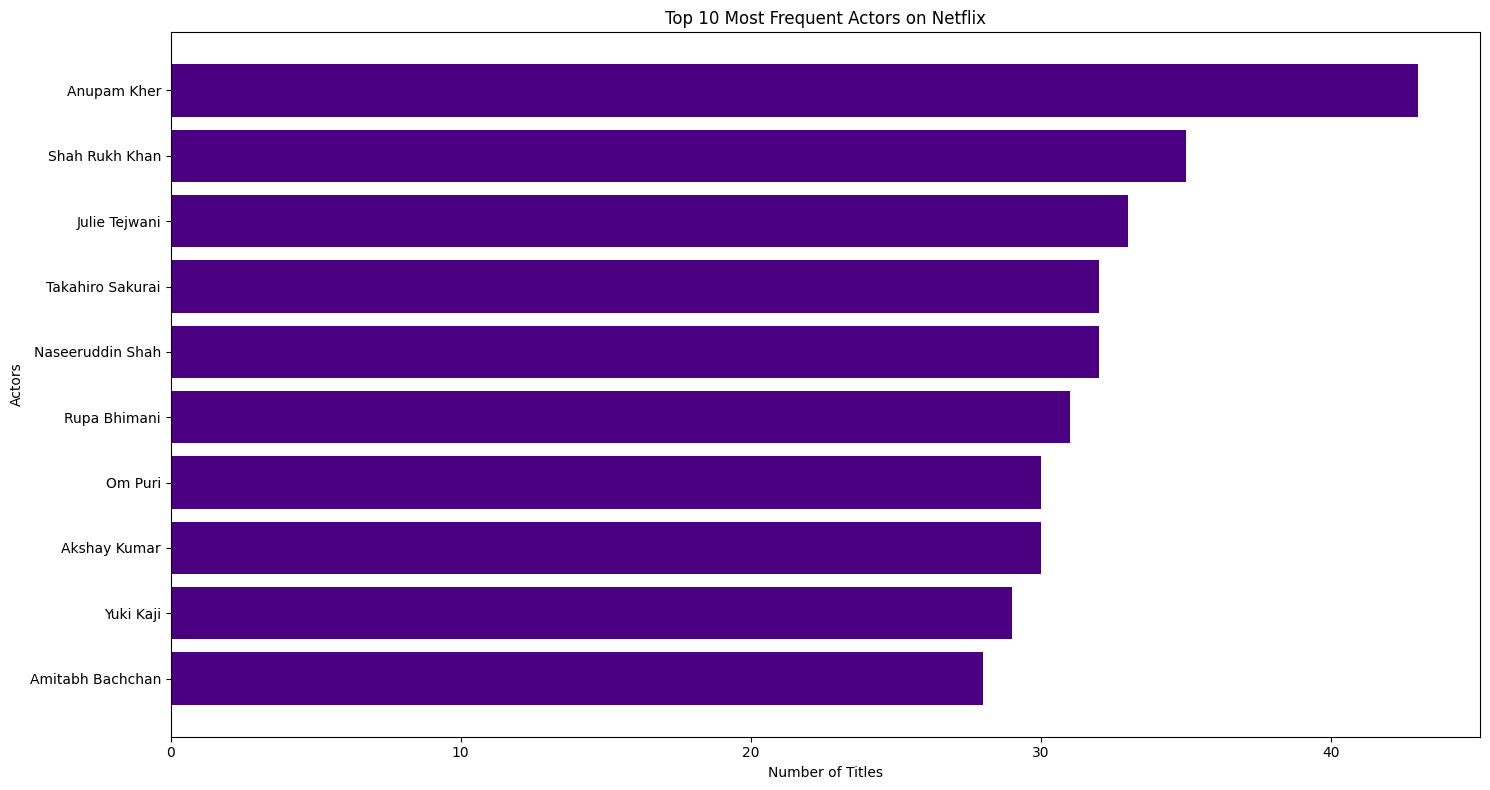

In [ ]:
# Filter rows where 'cast' is not null
df_actors = df[df['cast'].notnull()].copy()

# Split and explode multiple actors per title
df_actors['cast'] = df_actors['cast'].str.split(', ')
df_actors = df_actors.explode('cast')

# Clean up actor names
df_actors['cast'] = df_actors['cast'].str.strip()

# Group by actor and count unique titles
df_actors = df_actors.groupby('cast').agg({'title': 'nunique'}).reset_index()
df_actors = df_actors.rename(columns={'cast': 'Actor', 'title': 'Count'})

# Remove unknowns and sort top 10
df_actors = df_actors[df_actors['Actor'].str.lower() != "unknown actor"]
df_actors = df_actors.sort_values(by='Count', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.barh(df_actors['Actor'][::-1], df_actors['Count'][::-1], color='indigo')
plt.xlabel("Number of Titles")
plt.ylabel("Actors")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Step 1: Check your column names
print("Column names:", df_final.columns.tolist())

# Step 2: Strip any leading/trailing spaces from column names
df_final.columns = df_final.columns.str.strip()

# Step 3: Re-check column names
print("Cleaned column names:", df_final.columns.tolist())




Column names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
Cleaned column names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
df_final['Year'] = pd.to_datetime(df_final['date_added'].astype(str).str.strip(), errors='coerce').dt.year

print(df_final.columns)
df_final.groupby('Year').agg({'title': 'nunique'})


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Year'],
      dtype='object')


title
Year         
2008.0      2
2009.0      2
2010.0      1
2011.0     13
2012.0      3
2013.0     11
2014.0     24
2015.0     82
2016.0    429
2017.0   1188
2018.0   1649
2019.0   2016
2020.0   1879
2021.0   1498

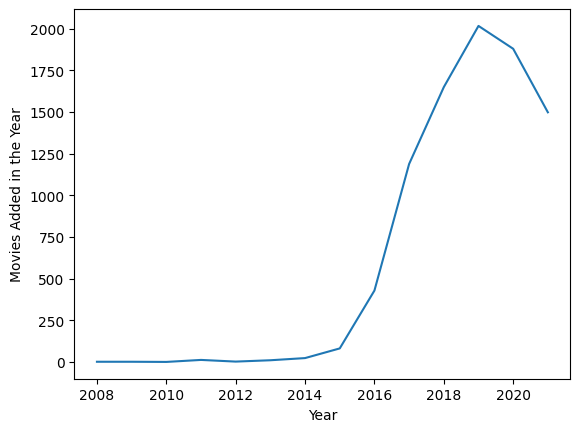

In [ ]:
df_final['date_added'] = df_final['date_added'].str.strip()  # remove extra spaces
df_final['date_added'] = pd.to_datetime(df_final['date_added'], format='%B %d, %Y')
df_final['year'] = df_final['date_added'].dt.year
df_year = df_final.groupby(['year']).agg({"title": "nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()

In [ ]:
print(df_final.columns)
df_final['week_added'] = pd.to_datetime(df_final['date_added']).dt.isocalendar().week
df_final.groupby('week_added').agg({'title': 'nunique'})



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Year', 'year'],
      dtype='object')


title
week_added       
1             372
2             108
3             113
4              88
5             208
6              97
7             147
8             110
9             254
10            135
11            163
12            109
13            250
14            173
15            152
16            160
17            154
18            234
19            116
20            131
21            117
22            206
23            151
24            164
25            143
26            268
27            240
28            130
29            140
30            160
31            268
32            122
33            153
34            143
35            263
36            142
37            183
38            139
39            166
40            287
41            116
42            135
43            116
44            318
45             98
46            134
47            120
48            199
49            140
50            189
51            137
52            132
53            104

In [ ]:
df_final['week_Added'] = pd.to_datetime(df_final['date_added']).dt.isocalendar().week
print(df_final.columns)
df_week = df_final.groupby('week_Added').agg({'title': 'nunique'}).reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()


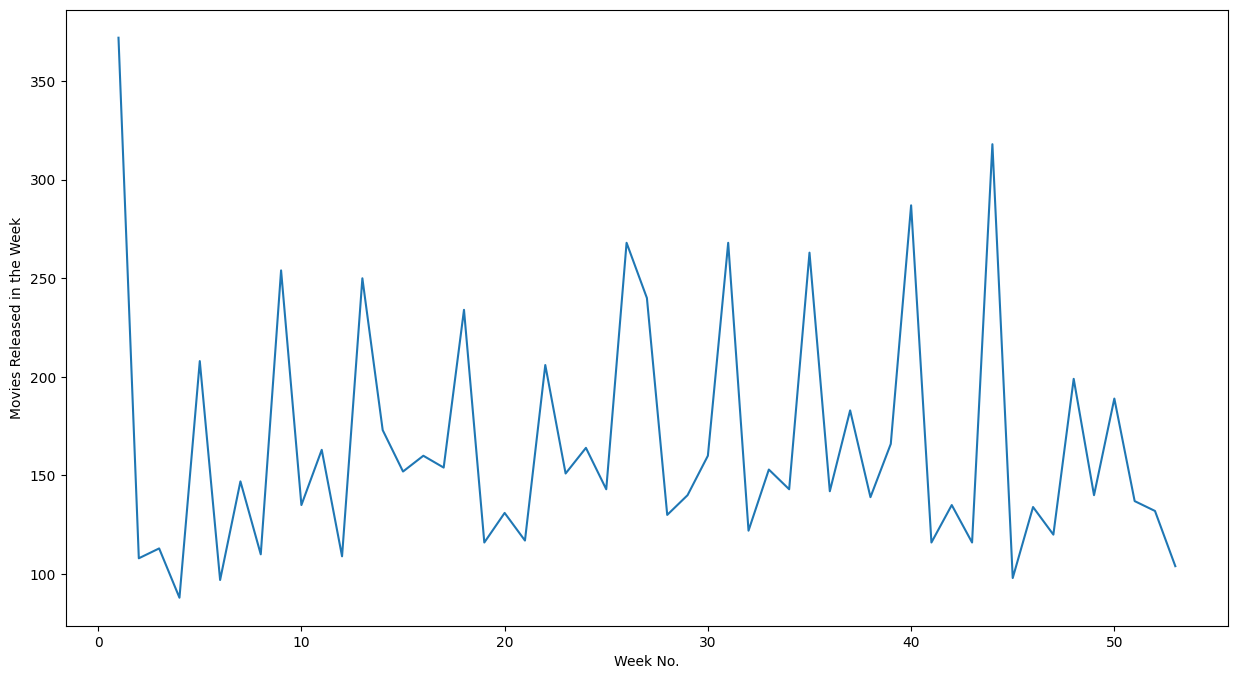

In [ ]:
df_week = df_final.groupby('week_added').agg({'title': 'nunique'}).reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()


In [ ]:
#number of distinct titles on the basis of week

print(df_final.columns)
df_final['month_added'] = pd.to_datetime(df_final['date_added']).dt.month
df_final.groupby('month_added').agg({'title': 'nunique'})


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Year', 'year', 'week_added', 'month_added'],
      dtype='object')


title
month_added       
1.0            738
2.0            563
3.0            742
4.0            764
5.0            632
6.0            728
7.0            827
8.0            755
9.0            770
10.0           760
11.0           705
12.0           813

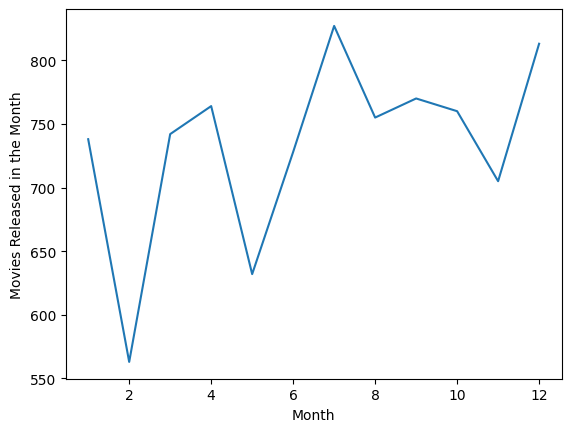

In [ ]:
df_month = df_final.groupby('month_added').agg({'title': 'nunique'}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()


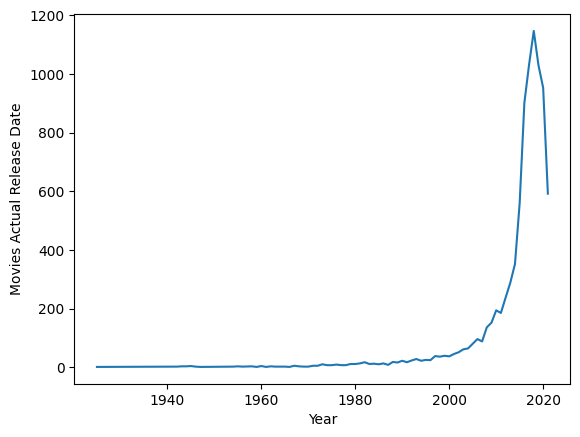

In [ ]:
df_release_year = df_final[df_final["release_year"] >= 1900].groupby("release_year").agg({"title": "nunique"}).reset_index()
sns.lineplot(data=df_release_year, x="release_year", y="title")
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()


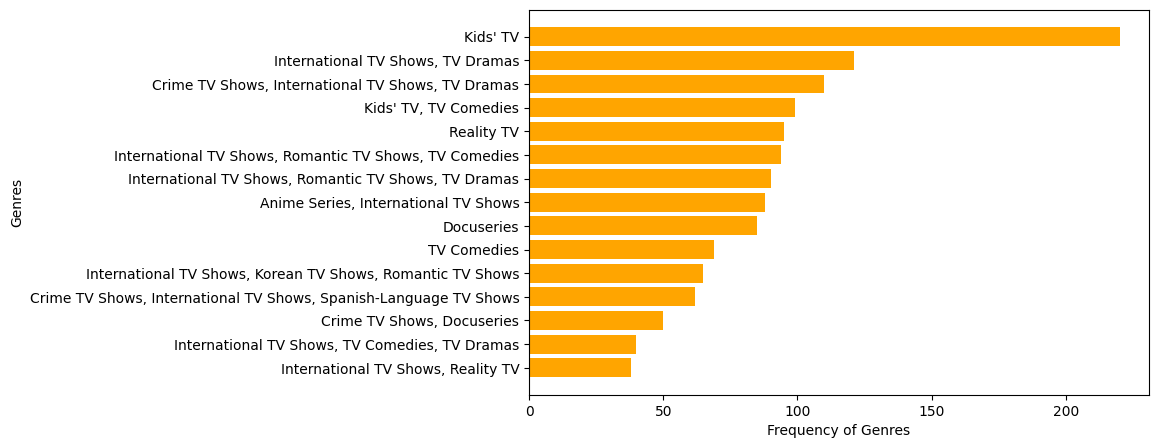

In [ ]:
# Separate data into TV shows and Movies
df_shows = df_final[df_final['type'] == 'TV Show']
df_movies = df_final[df_final['type'] == 'Movie']

# Replace 'Genre' with 'listed_in'
df_genres = df_shows.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]

# Plotting the genre frequencies for TV Shows
plt.figure(figsize=(8,5))
plt.barh(df_genres[::-1]['listed_in'], df_genres[::-1]['title'], color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()



In [ ]:
df_genres = df_movies.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.figure(figsize=(8,5))
plt.barh(df_genres[::-1]['listed_in'], df_genres[::-1]['title'], color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()


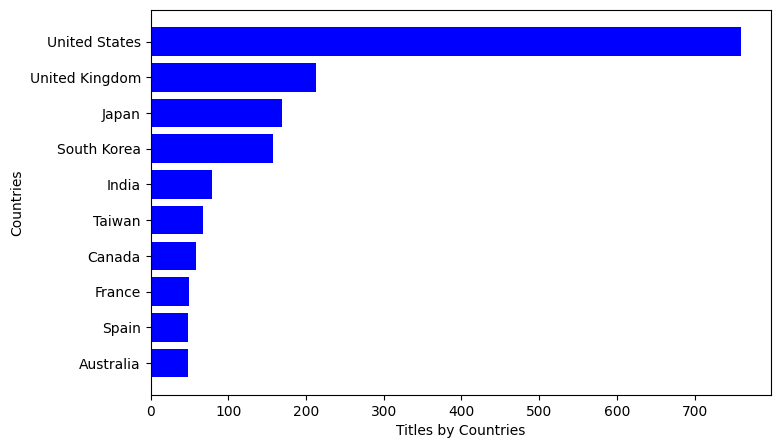

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_final = pd.read_csv('netflix.csv')

# Filter for TV Shows
df_shows = df_final[df_final['type'] == 'TV Show']

# Group and plot top 10 countries by number of unique TV show titles
df_country = df_shows.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.figure(figsize=(8,5))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'], color='blue')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

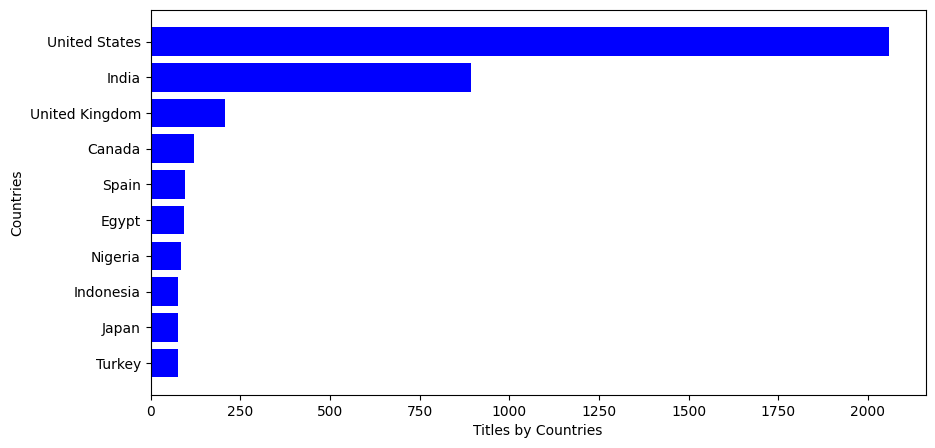

In [ ]:
df_final = pd.read_csv('netflix.csv')
df_movies = df_final[df_final['type'] == 'Movie']
df_country = df_movies.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'], color='blue')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()


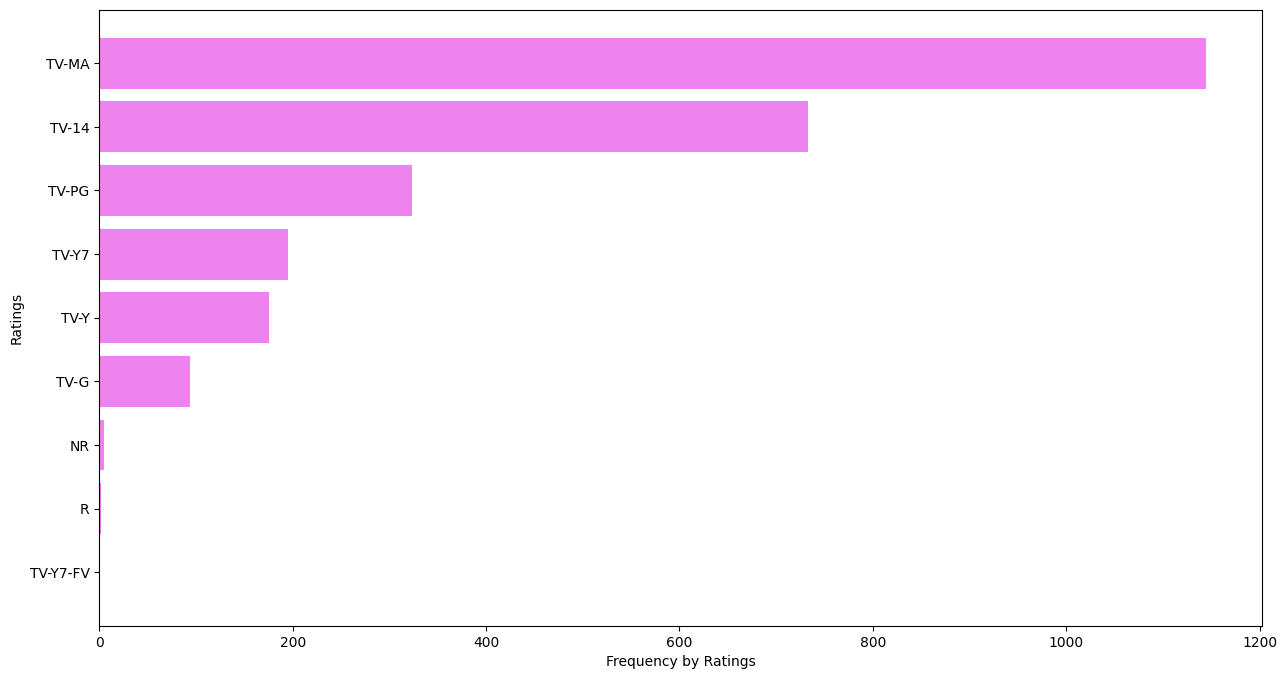

In [ ]:
df_rating = df_shows.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'], color='violet')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


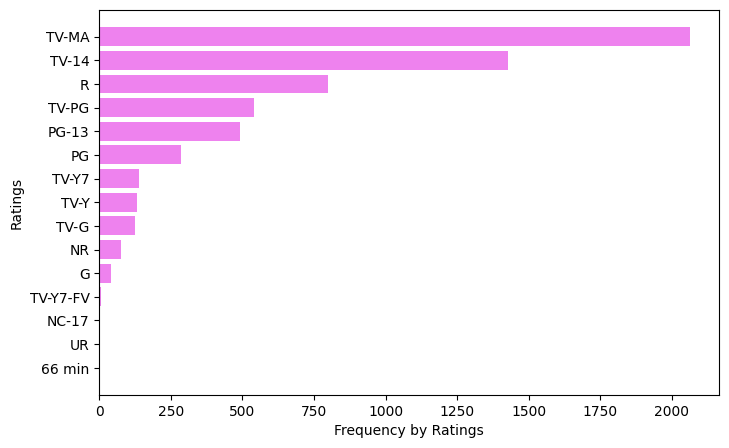

In [ ]:
df_rating = df_movies.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.figure(figsize=(8,5))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'], color='violet')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()


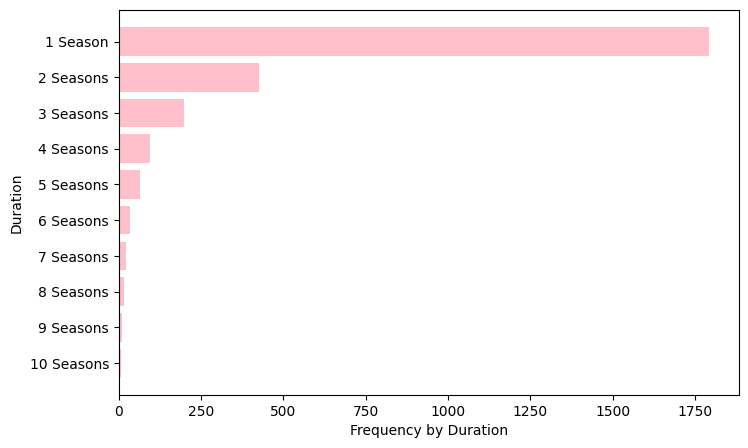

In [ ]:
df_duration = df_shows.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.figure(figsize=(8,5))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'], color='pink')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()


In [ ]:
df_duration = df_movies.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.figure(figsize=(8,5))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'], color='pink')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Year', 'year', 'week_added', 'month_added'],
      dtype='object')


<ipython-input-79-88c9753b8d07>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


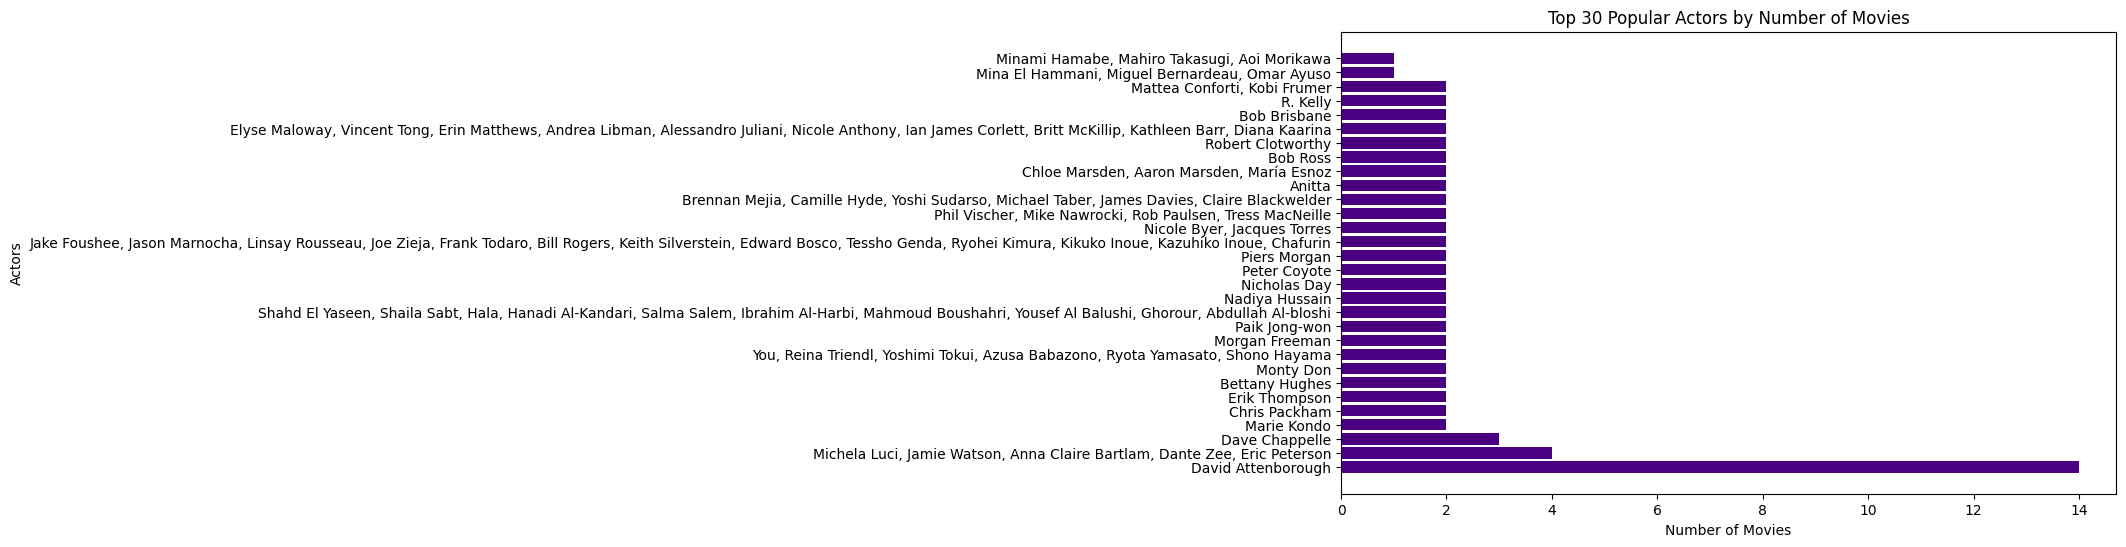

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Check your column names first (only needed once for debugging)
print(df_shows.columns)

# Group by the correct column name (update 'cast' if yours is different)
df_actors = df_shows.groupby('cast').agg({'title': 'nunique'}).reset_index()

# Sort by the number of unique movies each actor has been in
df_actors = df_actors.sort_values(by='title', ascending=False).head(30)

# Optional: remove unknown or placeholder actor names
df_actors = df_actors[df_actors['cast'] != 'Unknown Actor']

# Plotting
plt.figure(figsize=(10, 6))  # Slightly bigger figure
plt.barh(df_actors['cast'], df_actors['title'], color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.title('Top 30 Popular Actors by Number of Movies')
plt.tight_layout()
plt.show()


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


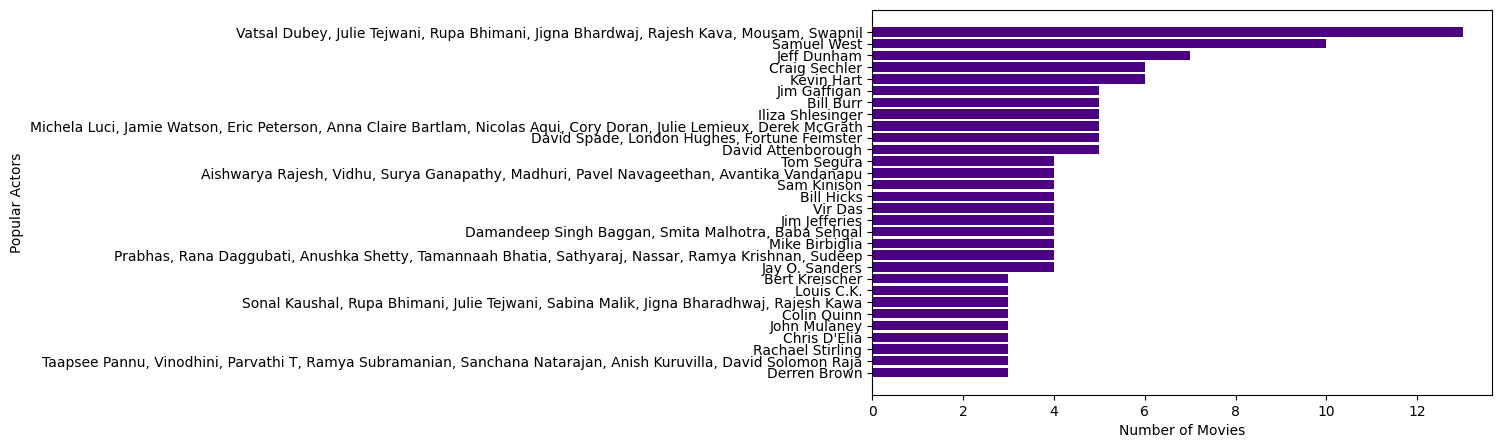

In [ ]:
print(df_movies.columns.tolist())
df_actors = df_movies.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by='title', ascending=False)[:30]
df_actors = df_actors[df_actors['cast'] != 'Unknown Actor']

plt.figure(figsize=(8,5))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'], color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()





['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


<ipython-input-82-c6aaaa0c29a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['cast'] = df_exploded['cast'].str.split(', ')  # Adjust split pattern if needed


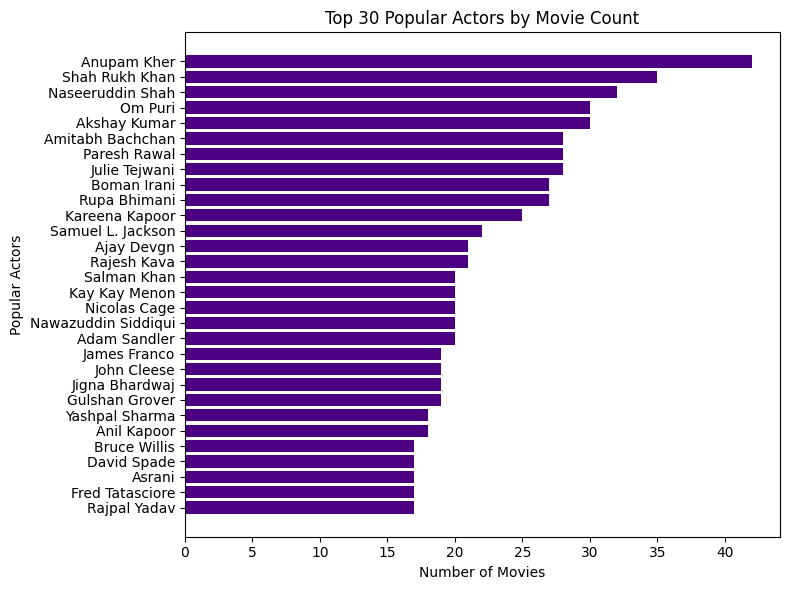

In [ ]:
print(df_movies.columns.tolist())
df_exploded = df_movies.dropna(subset=['cast'])  # Use actual column name
df_exploded['cast'] = df_exploded['cast'].str.split(', ')  # Adjust split pattern if needed
df_exploded = df_exploded.explode('cast')

df_actors = df_exploded.groupby('cast').agg({'title': 'nunique'}).reset_index()
df_actors = df_actors[df_actors['cast'] != 'Unknown Actor']
df_actors = df_actors.sort_values(by='title', ascending=False).head(30)

plt.figure(figsize=(8, 6))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'], color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.title('Top 30 Popular Actors by Movie Count')
plt.tight_layout()
plt.show()


In [ ]:
print(df_shows.columns.tolist())
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: View available columns
print("Columns in df_shows:", df_shows.columns.tolist())

# Use correct column names here (adjust if needed)
director_col = 'director'   # Use actual column name for director
title_col = 'title'         # Use actual column name for title

# Step 2: Proceed only if both columns exist
if director_col in df_shows.columns and title_col in df_shows.columns:
    # Group by director and count unique titles
    df_directors = (
        df_shows
        .groupby([director_col])
        .agg({title_col: 'nunique'})
        .reset_index()
        .sort_values(by=title_col, ascending=False)
        .head(11)
    )

    # Filter out unknown directors
    df_directors = df_directors[df_directors[director_col].str.lower() != 'unknown director']

    # Step 3: Plot
    plt.figure(figsize=(15, 8))
    plt.bar(df_directors[::-1][director_col], df_directors[::-1][title_col], color='indigo')
    plt.xlabel('Popular Directors')
    plt.ylabel('Number of Unique Titles')
    plt.title('Top 10 Directors by Unique Titles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both of these columns are missing: '{director_col}', '{title_col}'")


In [ ]:
df_shows.columns = df_shows.columns.str.lower()


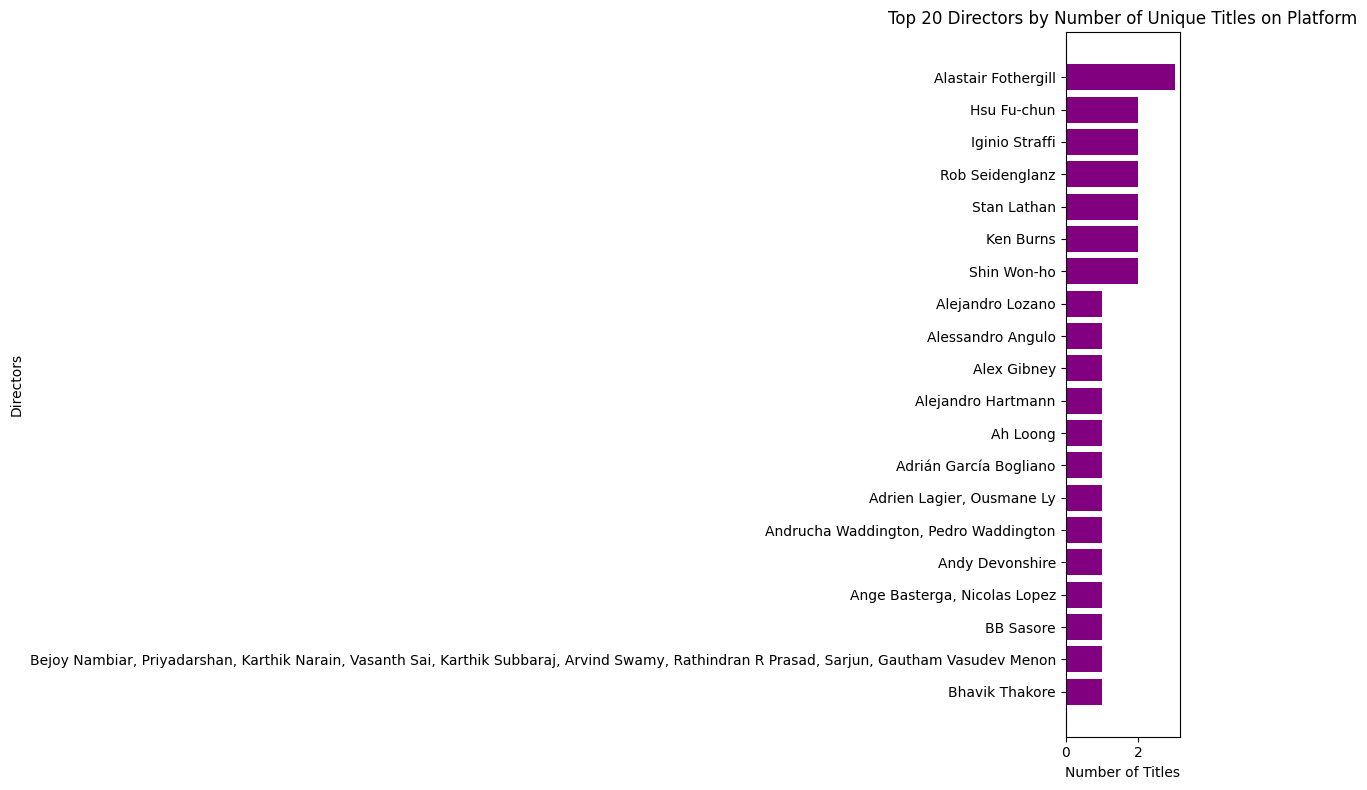

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

director_col = 'director'
title_col = 'title'

# Group by director and count unique titles
df_directors = (
    df_shows
    .groupby(director_col)
    .agg({title_col: 'nunique'})
    .reset_index()
    .sort_values(by=title_col, ascending=False)
    .head(20)  # Show top 20 directors
)

# Filter out unknown or missing directors (optional)
df_directors = df_directors[df_directors[director_col].str.lower() != 'unknown director']

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_directors[director_col], df_directors[title_col], color='purple')
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.title("Top 20 Directors by Number of Unique Titles on Platform")
plt.gca().invert_yaxis()  # Invert y-axis so the top director is at the top
plt.tight_layout()
plt.show()


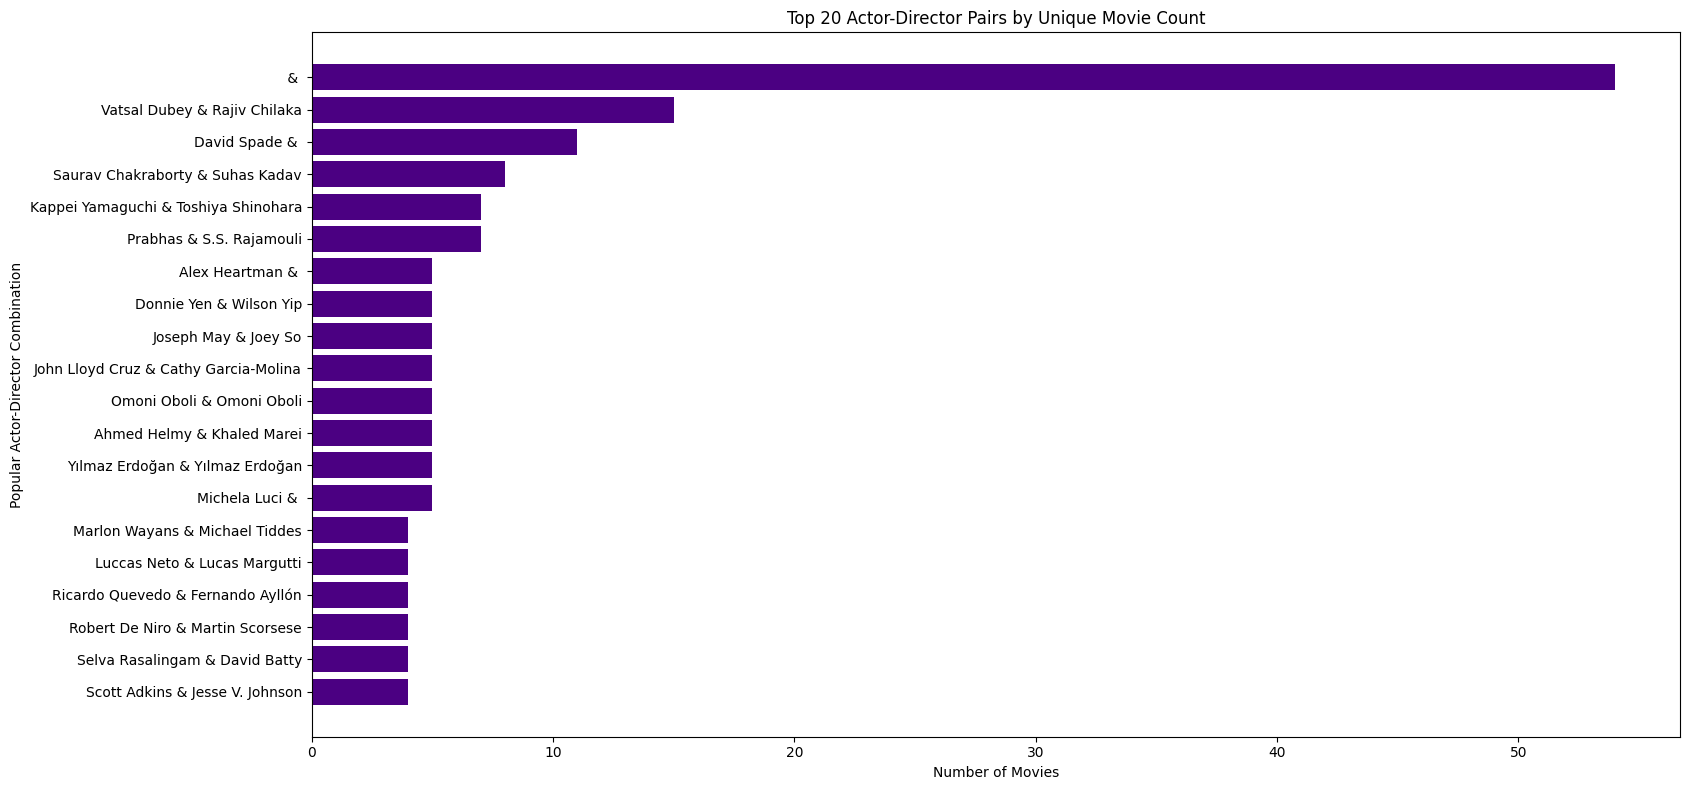

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy to avoid SettingWithCopyWarning
df_movies_clean = df_movies.copy()

# Fill missing values
df_movies_clean['cast'] = df_movies_clean['cast'].fillna('')
df_movies_clean['director'] = df_movies_clean['director'].fillna('')

# Extract main actor (first in the list)
df_movies_clean['main_actor'] = df_movies_clean['cast'].apply(lambda x: x.split(',')[0].strip())

# Create the combination column
df_movies_clean['Actor_Director_Combination'] = df_movies_clean['main_actor'] + ' & ' + df_movies_clean['director']

# Group by combination and count unique movies
df_actors_directors = df_movies_clean.groupby('Actor_Director_Combination') \
    .agg({'title': 'nunique'}) \
    .reset_index() \
    .sort_values(by='title', ascending=False)[:20]

# Plotting
plt.figure(figsize=(17, 8))
plt.barh(
    df_actors_directors[::-1]['Actor_Director_Combination'],
    df_actors_directors[::-1]['title'],
    color='indigo'
)
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.title('Top 20 Actor-Director Pairs by Unique Movie Count')
plt.tight_layout()
plt.show()


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'main_actor', 'Actor_Director_Combination']


<ipython-input-93-afc30fc1ecc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['Actor_Director_Combination'] = df_movies['cast'].fillna('') + ' & ' + df_movies['director'].fillna('')


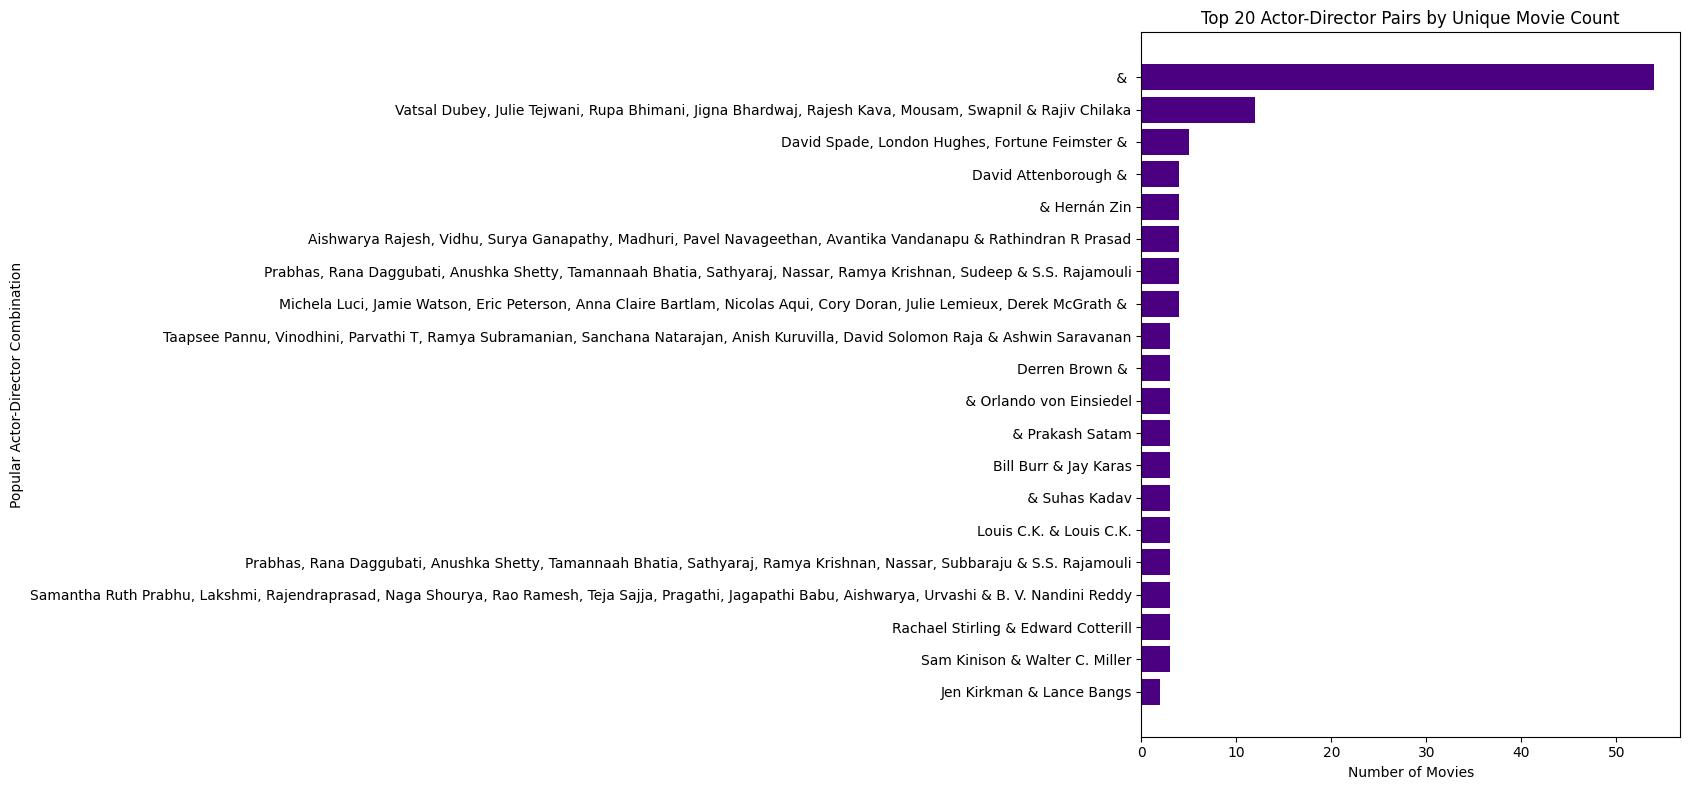

In [ ]:
print(df_movies.columns.tolist())

df_movies['Actor_Director_Combination'] = df_movies['cast'].fillna('') + ' & ' + df_movies['director'].fillna('')
df_actors_directors = df_movies.groupby('Actor_Director_Combination') \
    .agg({'title': 'nunique'}).reset_index() \
    .sort_values(by='title', ascending=False)[:20]

plt.figure(figsize=(17, 8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'], color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.title('Top 20 Actor-Director Pairs by Unique Movie Count')
plt.tight_layout()
plt.show()


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year', 'year', 'week_added', 'month_added']
10


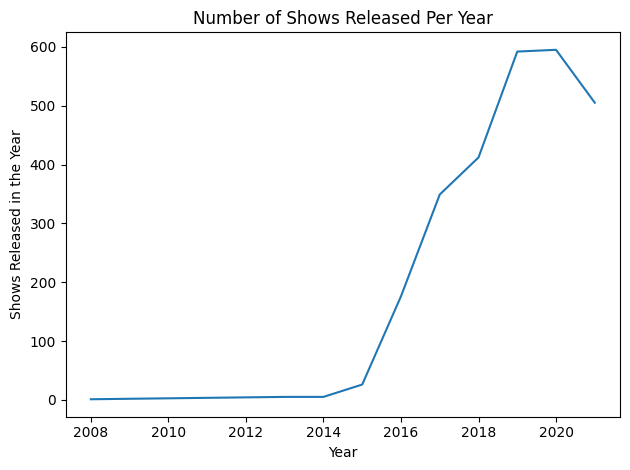

In [ ]:
print(df_shows.columns.tolist())
df_shows = df_shows.loc[:, ~df_shows.columns.duplicated()]
print(df_shows['year'].isna().sum())
df_shows = df_shows.dropna(subset=['year'])
df_year = df_shows.groupby('year').agg({'title': 'nunique'}).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel('Shows Released in the Year')
plt.xlabel('Year')
plt.title('Number of Shows Released Per Year')
plt.tight_layout()
plt.show()



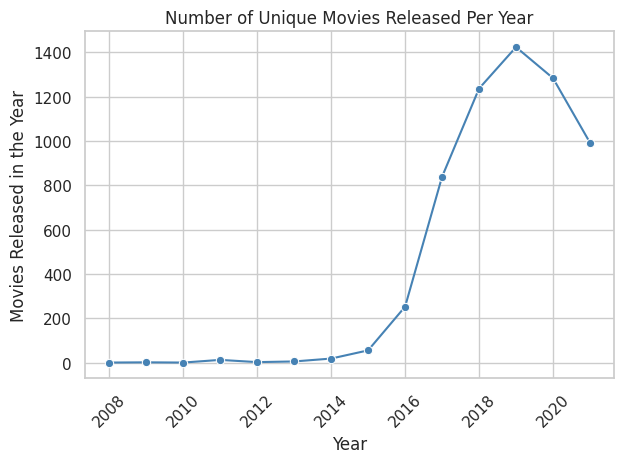

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and count unique titles
df_year = df_movies.groupby("year").agg({"title": "nunique"}).reset_index()

# Plot as a line chart
sns.lineplot(data=df_year, x="year", y="title", marker="o", color="steelblue")

# Labels and formatting
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.title("Number of Unique Movies Released Per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


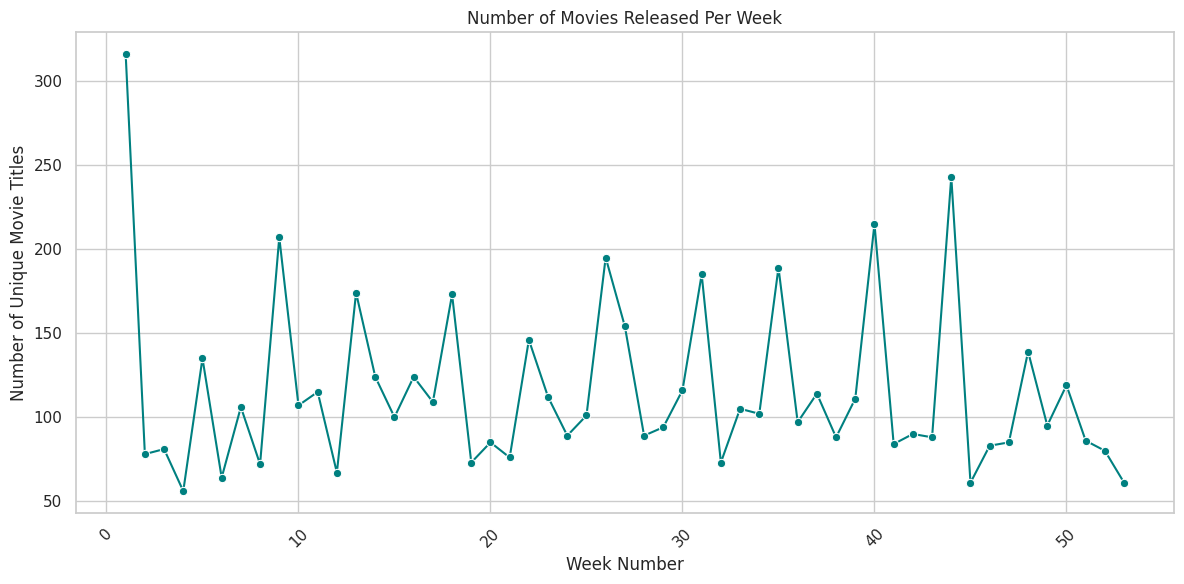

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Convert 'date_added' to datetime
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'], errors='coerce')

# STEP 2: Extract week number
df_movies['week_added'] = df_movies['date_added'].dt.isocalendar().week

# STEP 3: Group by week and count unique movie titles
df_week = df_movies.groupby('week_added').agg({'title': 'nunique'}).reset_index()

# STEP 4: Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_week, x='week_added', y='title', marker='o', color='teal')
plt.title('Number of Movies Released Per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Unique Movie Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



type
Movie      6131
TV Show    2666
Name: count, dtype: int64


<ipython-input-25-3530254502b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


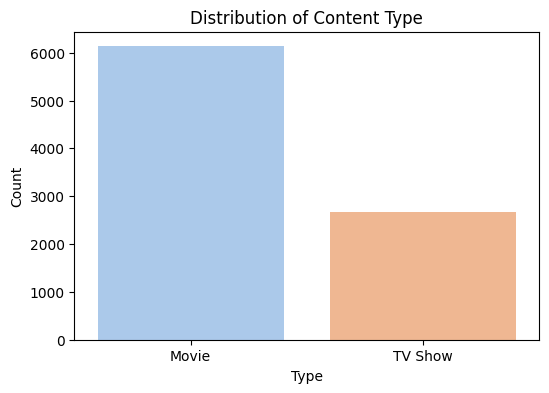

rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64


<ipython-input-25-3530254502b6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')


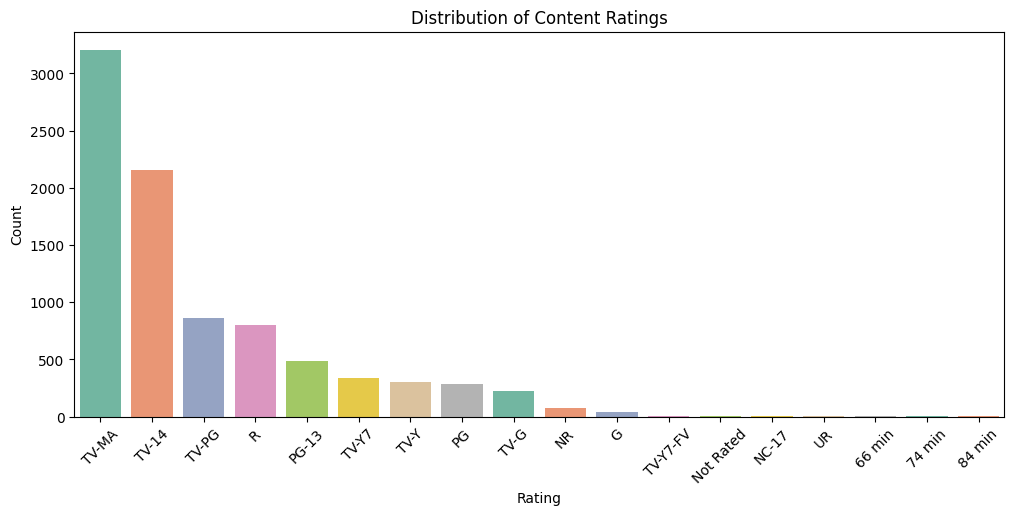

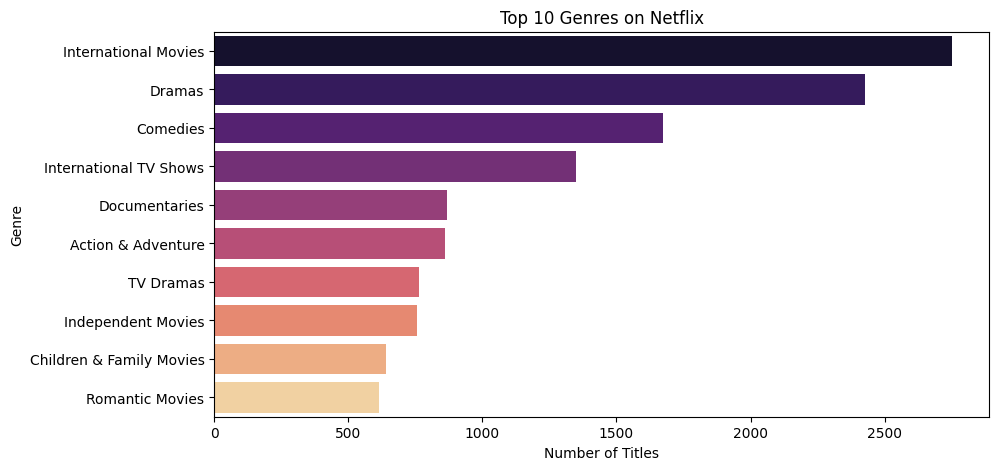

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Type of content: Movie vs TV Show
print(df['type'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Rating distribution
print(df['rating'].value_counts())

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Genre (listed_in)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,   # Add hue
    palette='magma',
    dodge=False             # Ensures no splitting
)
plt.legend([],[], frameon=False)  # Hides the legend
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()



In [ ]:
# Count the number of Movies and TV Shows per country
country_type_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

# Get top 10 countries with most titles overall
top_countries = df['country'].value_counts().head(10).index
country_type_counts = country_type_counts[country_type_counts['country'].isin(top_countries)]


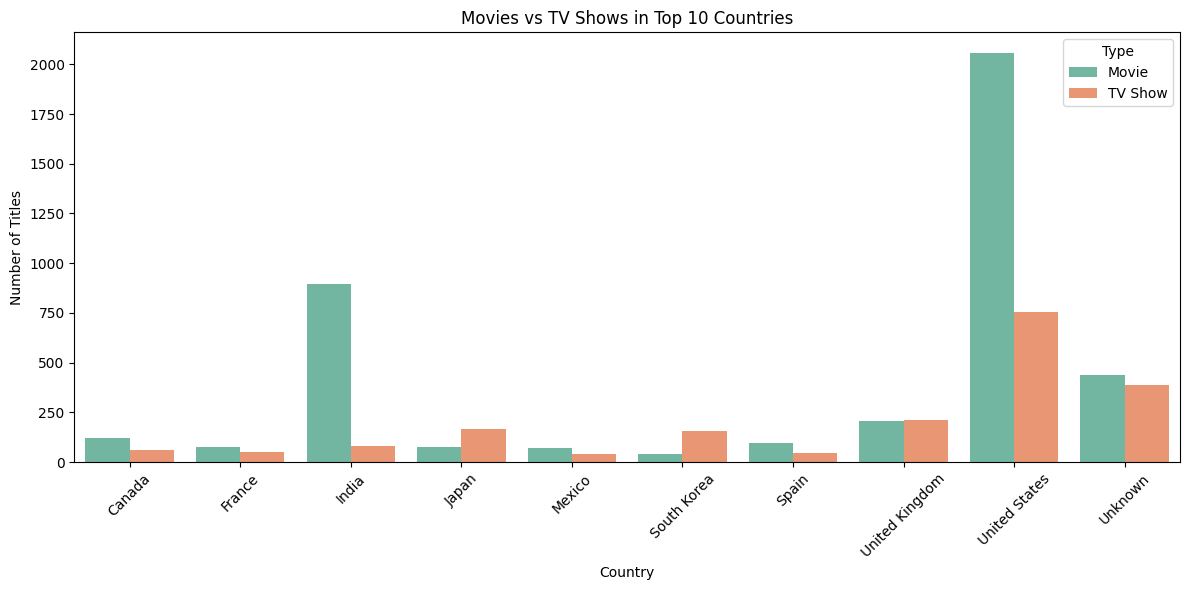

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_type_counts,
    x='country',
    y='count',
    hue='type',
    palette='Set2'
)
plt.title('Movies vs TV Shows in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


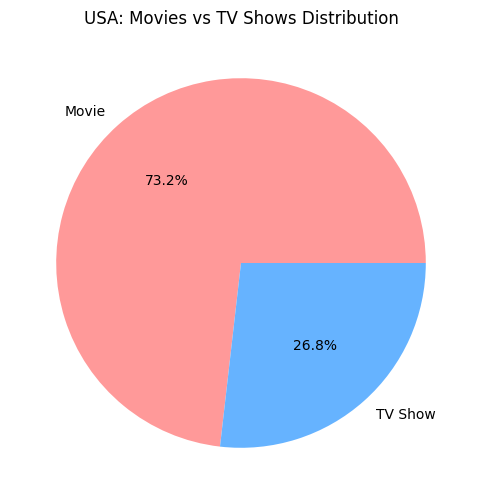

In [ ]:
usa_data = df[df['country'] == 'United States']['type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(usa_data, labels=usa_data.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('USA: Movies vs TV Shows Distribution')
plt.show()


<ipython-input-31-399cbedde4fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='plasma')


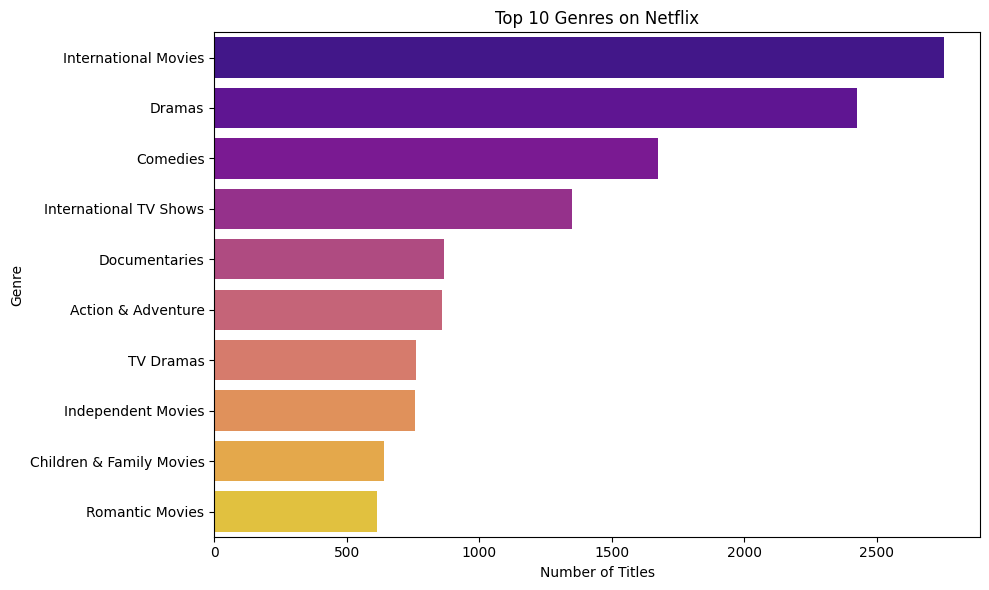

In [ ]:
# Genre count (after exploding earlier)
genre_counts = df['listed_in'].explode().value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='plasma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


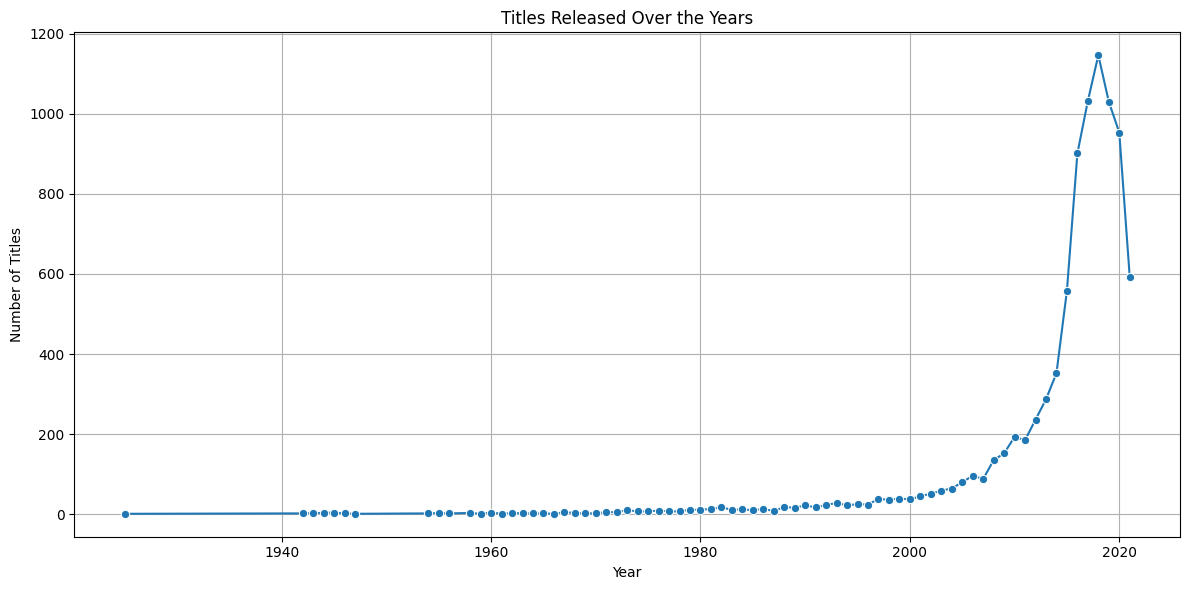

In [ ]:
# Count titles released each year
titles_per_year = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


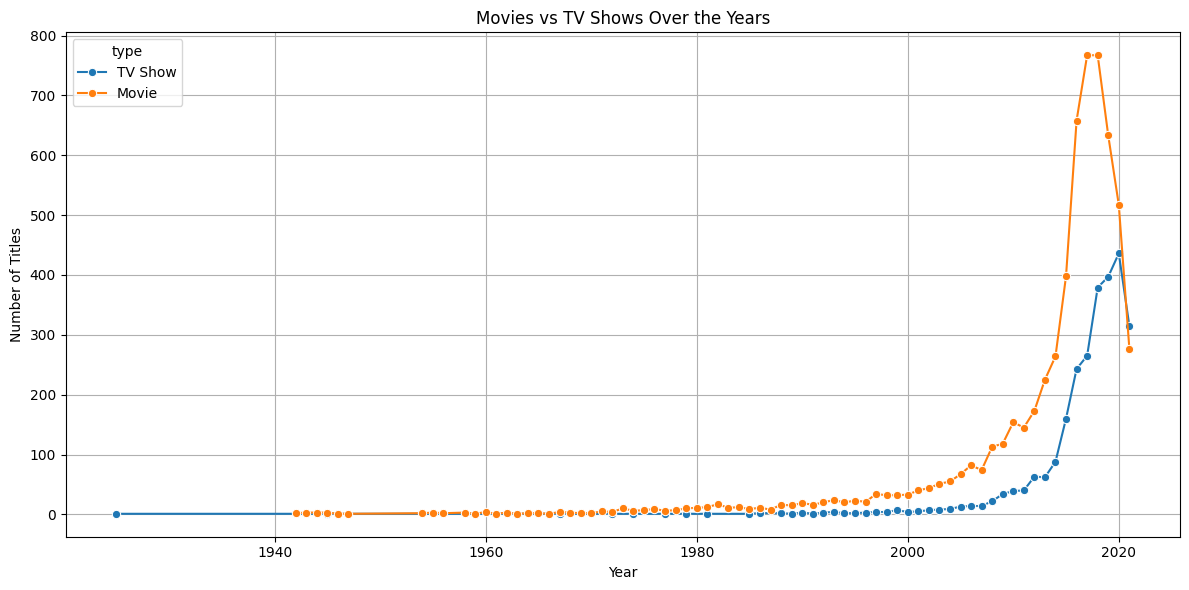

In [ ]:
# Group by release year and type
type_year_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=type_year_counts, x='release_year', y='count', hue='type', marker='o')
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-66-386ba56786bf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


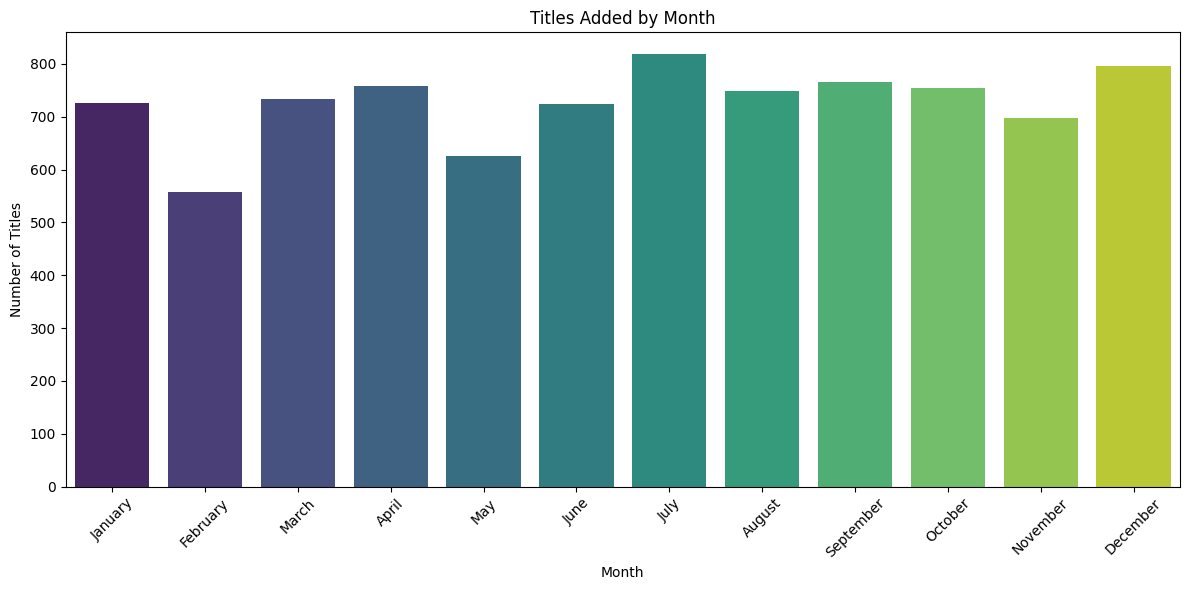

In [ ]:
# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and week
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week
# Count titles per month
month_counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])


# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Titles Added by Month')
plt.ylabel('Number of Titles')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove any legend if auto-added
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix.csv")  # Update path if necessary

# Filter movies and TV shows separately
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration values
movies_df['duration_int'] = movies_df['duration'].str.extract('(\d+)').astype(float)
tv_df['duration_int'] = tv_df['duration'].str.extract('(\d+)').astype(float)


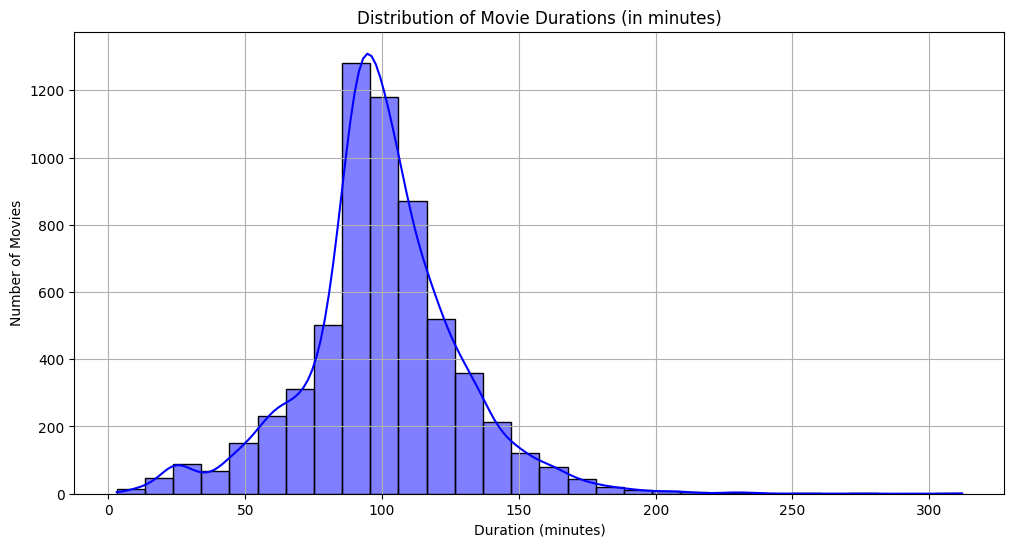

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_int'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


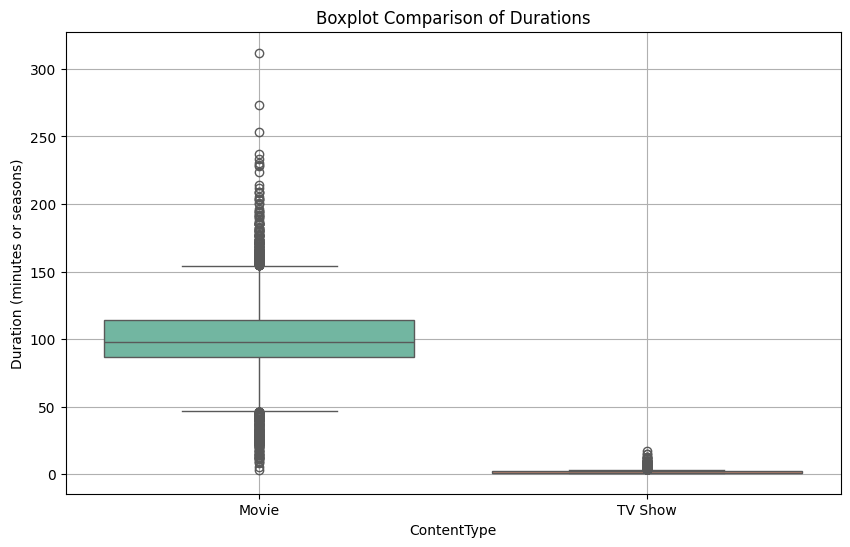

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_data, x='ContentType', y='duration_int', hue='ContentType', palette='Set2', dodge=False, legend=False)
plt.title('Boxplot Comparison of Durations')
plt.ylabel('Duration (minutes or seasons)')
plt.grid(True)
plt.show()



**Insights**:Movies usually range from 60 to 120 minutes, with a few long-form entries >150 mins.

TV Shows are heavily skewed toward 1–2 season formats.

Outliers can highlight special mini-series or long-running franchises.

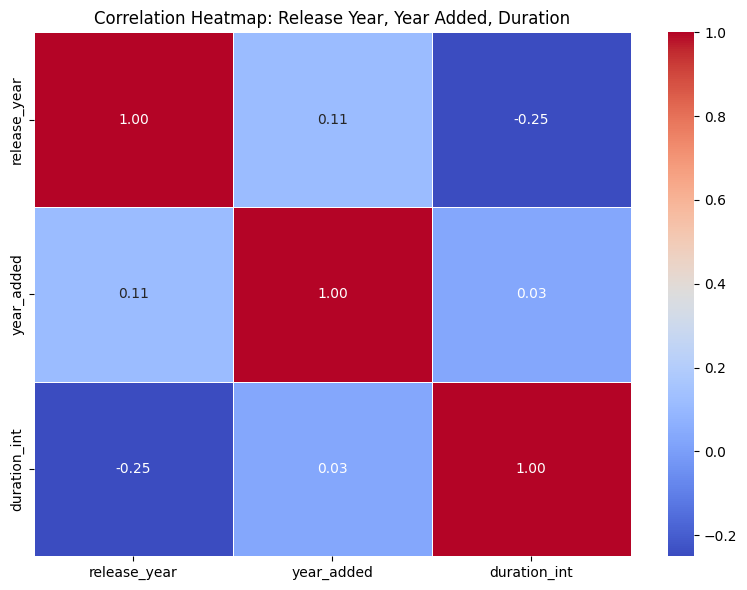

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("netflix.csv")  # Change the path if needed

# Step 1: Clean 'date_added' column
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Step 2: Extract numeric duration from 'duration' column
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# Step 3: Prepare DataFrame for correlation
correlation_df = df[['release_year', 'year_added', 'duration_int']].dropna()

# Step 4: Generate correlation matrix and plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Release Year, Year Added, Duration')
plt.tight_layout()
plt.show()


In [ ]:
pip install wordcloud


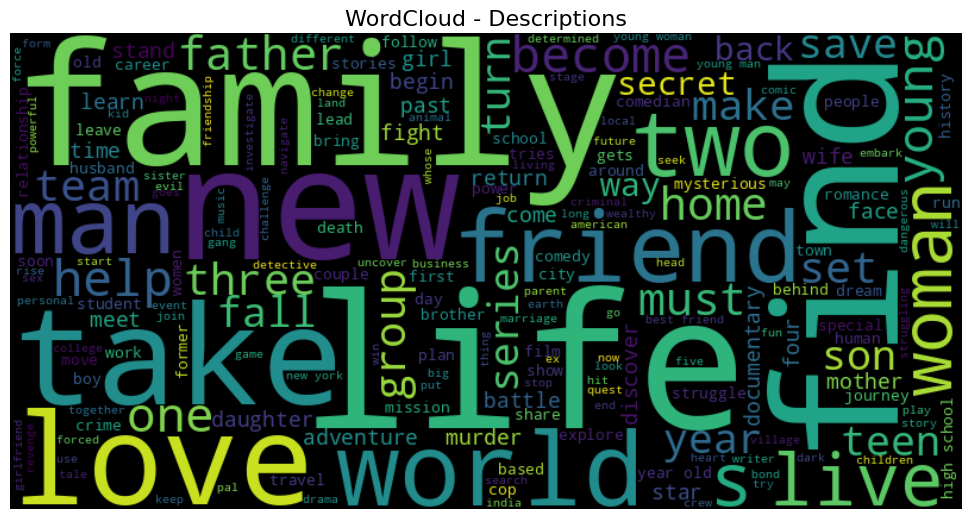

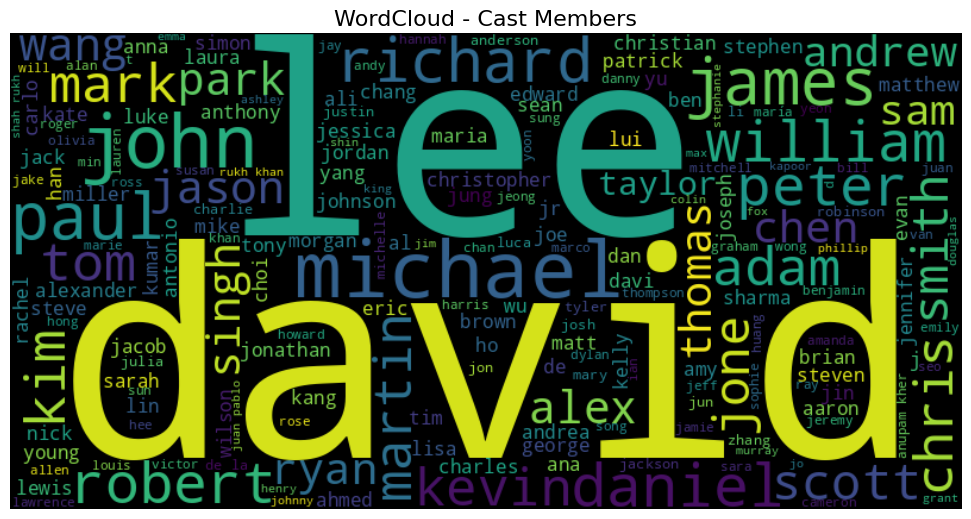

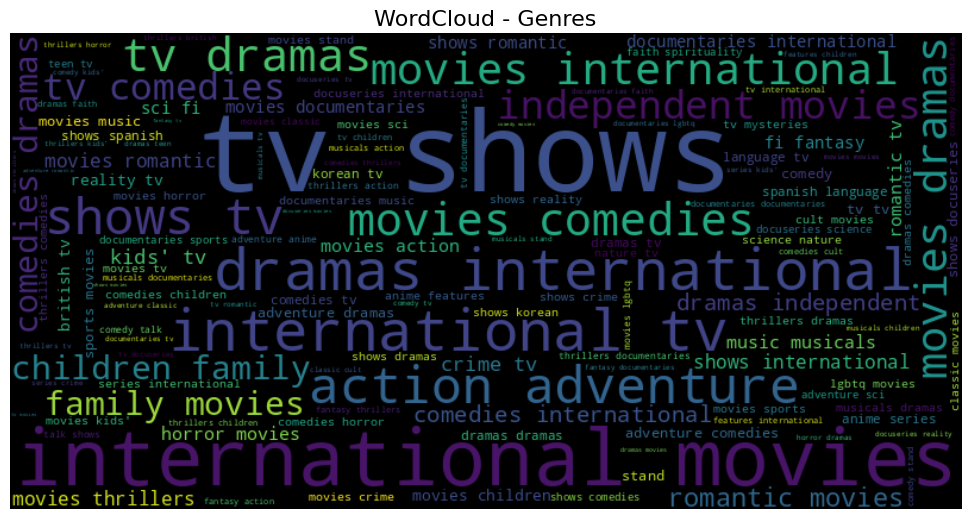

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("netflix.csv")

# Custom function to generate and display a word cloud
def generate_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          stopwords=stopwords, colormap='viridis').generate(str(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout(pad=0)
    plt.show()

# WordCloud from 'description'
generate_wordcloud(df['description'].dropna().str.lower().str.cat(sep=' '), "WordCloud - Descriptions")

# WordCloud from 'cast'
generate_wordcloud(df['cast'].dropna().str.lower().str.cat(sep=', '), "WordCloud - Cast Members")

# WordCloud from 'listed_in' (genres/categories)
generate_wordcloud(df['listed_in'].dropna().str.lower().str.cat(sep=', '), "WordCloud - Genres")


In [ ]:
import pandas as pd

df = pd.read_csv('netflix.csv')
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['weekday_added'] = df['date_added'].dt.day_name()


<ipython-input-77-28b95c3a2c4d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


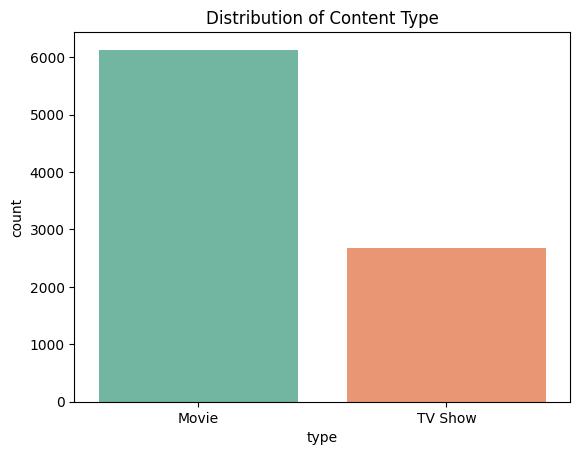

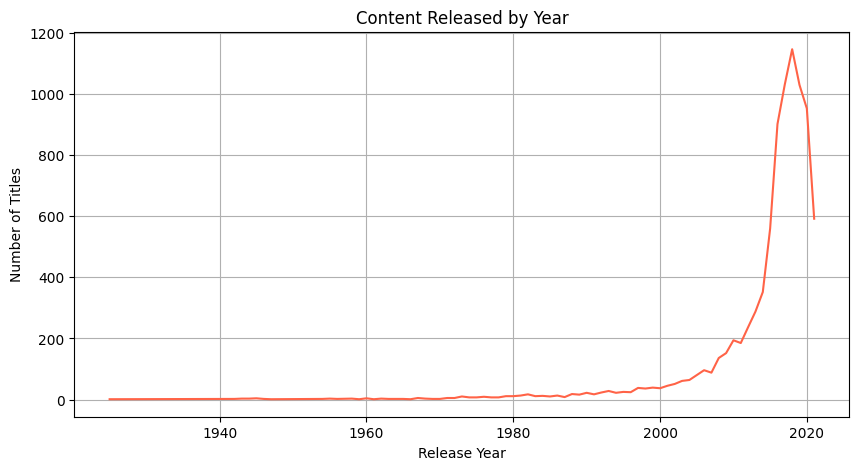

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


df = pd.read_csv('netflix.csv')

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract date components
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['weekday_added'] = df['date_added'].dt.day_name()

# Fill missing values
df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')


sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.show()


df['release_year'] = df['release_year'].astype('Int64')
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), color='tomato')
plt.title('Content Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()





In [ ]:
# Movies
top_movies = df[df['type'] == 'Movie'].groupby('country')['title'].count().nlargest(10)
# TV Shows
top_tv = df[df['type'] == 'TV Show'].groupby('country')['title'].count().nlargest(10)


In [ ]:
# TV Shows
tv = df[df['type'] == 'TV Show']
tv.groupby('weekday_added')['title'].count().sort_values(ascending=False)
tv.groupby('month_added')['title'].count().sort_values(ascending=False)


month_added
12.0    266
7.0     262
9.0     251
6.0     236
8.0     236
10.0    215
4.0     214
3.0     213
11.0    207
5.0     193
1.0     192
2.0     181
Name: title, dtype: int64

In [ ]:
from collections import Counter

directors = df['director'].dropna().str.split(', ')
flat_list = [d for sublist in directors for d in sublist]
Counter(flat_list).most_common(10)


[('Unknown Director', 2634),
 ('Rajiv Chilaka', 22),
 ('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16),
 ('Jay Karas', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12)]

In [ ]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['days_to_add'] = (df['date_added'] - df['release_year']).dt.days
df['days_to_add'].dropna().mode()


0    334.0
Name: days_to_add, dtype: float64

<ipython-input-84-af8e1223b456>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set2")


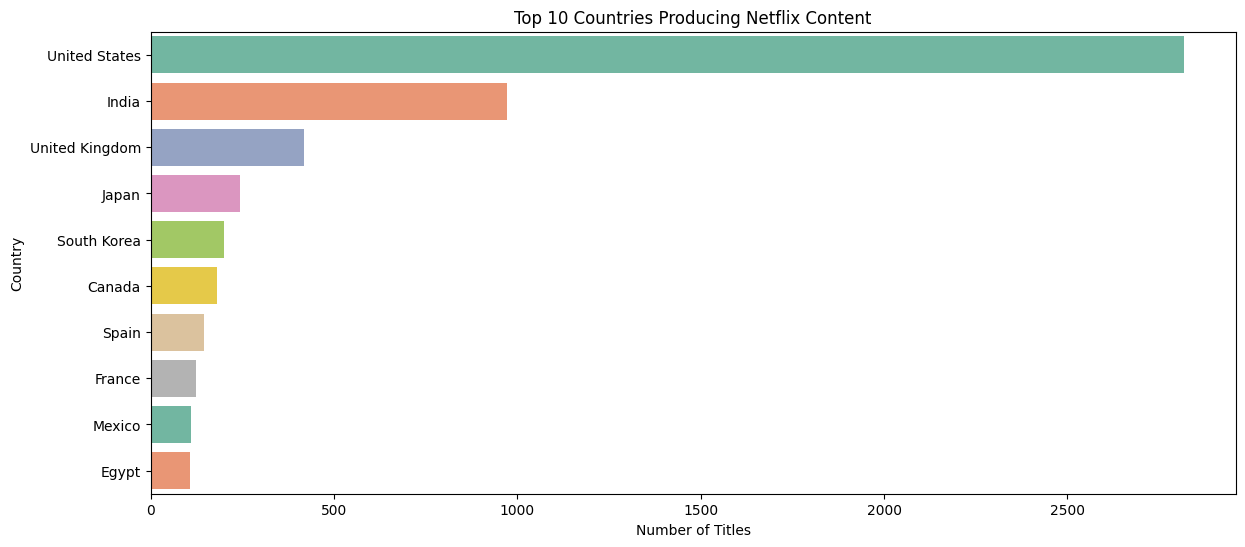

In [ ]:
# Top 10 countries for Movies and TV Shows
plt.figure(figsize=(14,6))
top_countries = df[df['country'] != 'Unknown Country']
top_countries = top_countries['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set2")
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


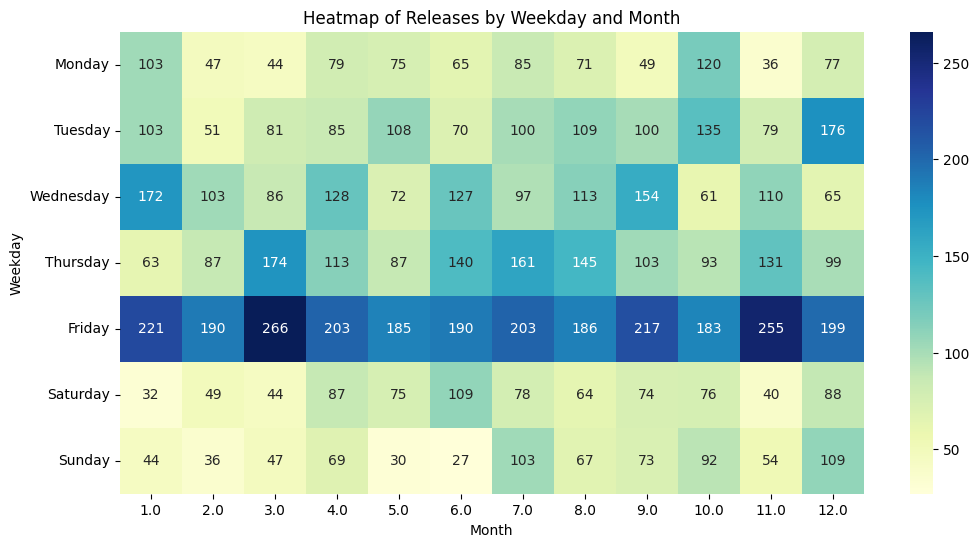

In [ ]:
# Add weekday column
df['weekday_added'] = df['date_added'].dt.day_name()

# Heatmap data pivot
heatmap_data = df.pivot_table(index='weekday_added', columns='month_added', values='show_id', aggfunc='count')

# Reorder weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Releases by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()


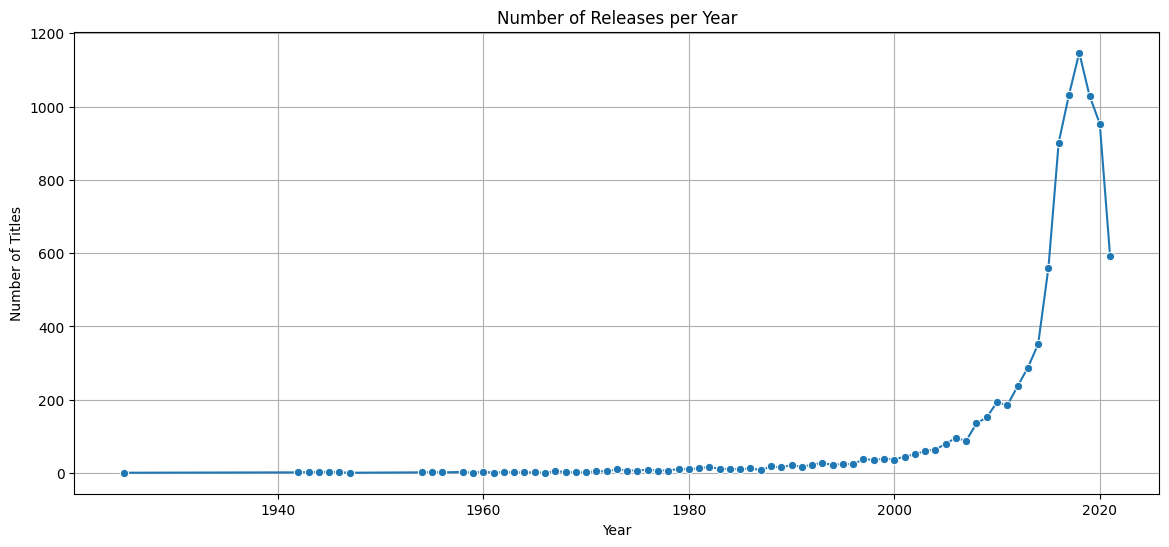

In [ ]:
# Releases per year
releases_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker='o')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


In [ ]:
# Drop NaN and explode cast
df_cast = df[['show_id', 'type', 'title', 'cast']].dropna()
df_cast['cast'] = df_cast['cast'].str.split(',').apply(lambda x: [i.strip() for i in x])
df_cast = df_cast.explode('cast')



In [ ]:
# Drop NaN and explode director
df_director = df[['show_id', 'type', 'title', 'director']].dropna()
df_director['director'] = df_director['director'].str.split(',').apply(lambda x: [i.strip() for i in x])
df_director = df_director.explode('director')


In [ ]:
# Drop NaN and explode genres
df_genre = df[['show_id', 'type', 'title', 'listed_in']].dropna()
df_genre['listed_in'] = df_genre['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x])
df_genre = df_genre.explode('listed_in')


<ipython-input-93-0448a90de4e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette="magma")


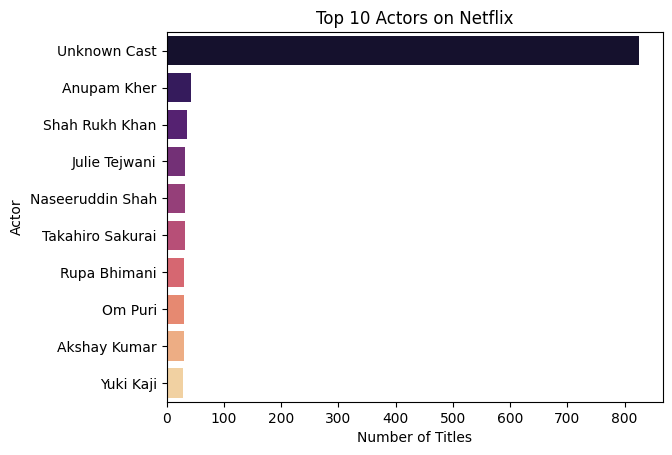

In [ ]:
top_actors = df_cast['cast'].value_counts().head(10)
sns.barplot(y=top_actors.index, x=top_actors.values, palette="magma")
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


<ipython-input-94-142f803ed435>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")


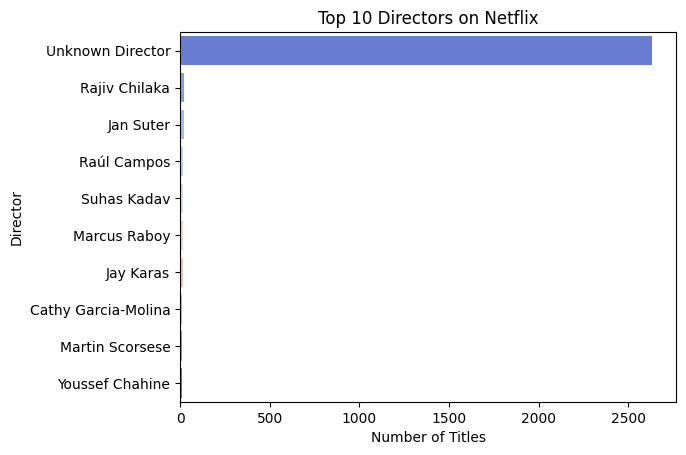

In [ ]:
top_directors = df_director['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [ ]:

# Replace nulls in 'cast' and 'director' with meaningful placeholders
df['cast'] = df['cast'].fillna('Unknown Actor')
df['director'] = df['director'].fillna('Unknown Director')
df['country'] = df['country'].fillna('Unknown Country')
df['rating'] = df['rating'].fillna('Unknown Rating')
df['date_added'] = df['date_added'].fillna('Unknown Date')
df['listed_in'] = df['listed_in'].fillna('Unknown Genre')


In [ ]:
# Un-nest cast safely (including Unknown Actor)
df_cast = df[['show_id', 'type', 'title', 'cast']].copy()
df_cast['cast'] = df_cast['cast'].str.split(',').apply(lambda x: [i.strip() for i in x])
df_cast = df_cast.explode('cast')


In [ ]:
# Non-graphical counts
# Import the pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix.csv")  # Ensure the file is in the same directory or uploaded

# Preview the dataset
df.head()
df = pd.read_csv("netflix.csv")
print(df['type'].value_counts())
print(df['country'].value_counts().head(10))
print(df['rating'].value_counts())
print(df['listed_in'].explode().value_counts().head(10))  # for genres


type
Movie      6131
TV Show    2676
Name: count, dtype: int64
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Child

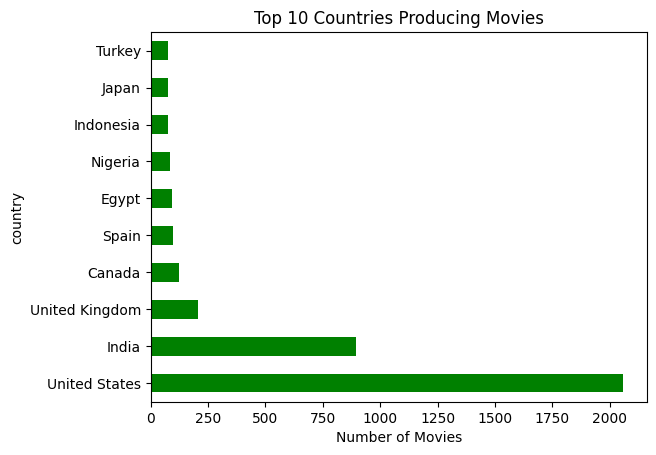

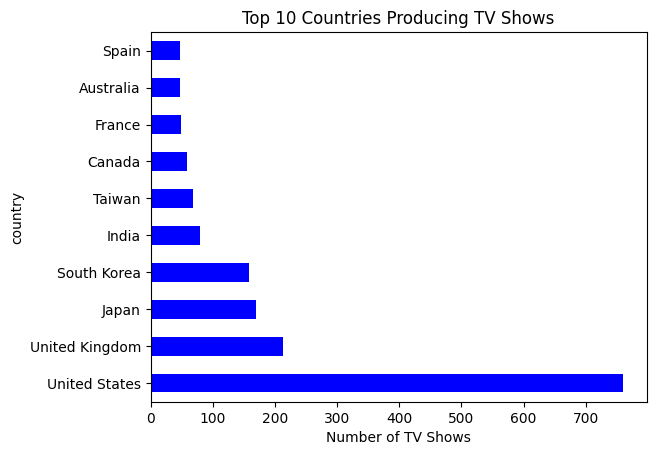

In [ ]:
# Top 10 countries producing movies
import matplotlib.pyplot as plt
movies = df[df['type'] == 'Movie']
top_movie_countries = movies['country'].value_counts().head(10)
top_movie_countries.plot(kind='barh', color='green')
plt.title("Top 10 Countries Producing Movies")
plt.xlabel("Number of Movies")
plt.show()

# Top 10 countries producing TV Shows
tv_shows = df[df['type'] == 'TV Show']
top_tv_countries = tv_shows['country'].value_counts().head(10)
top_tv_countries.plot(kind='barh', color='blue')
plt.title("Top 10 Countries Producing TV Shows")
plt.xlabel("Number of TV Shows")
plt.show()


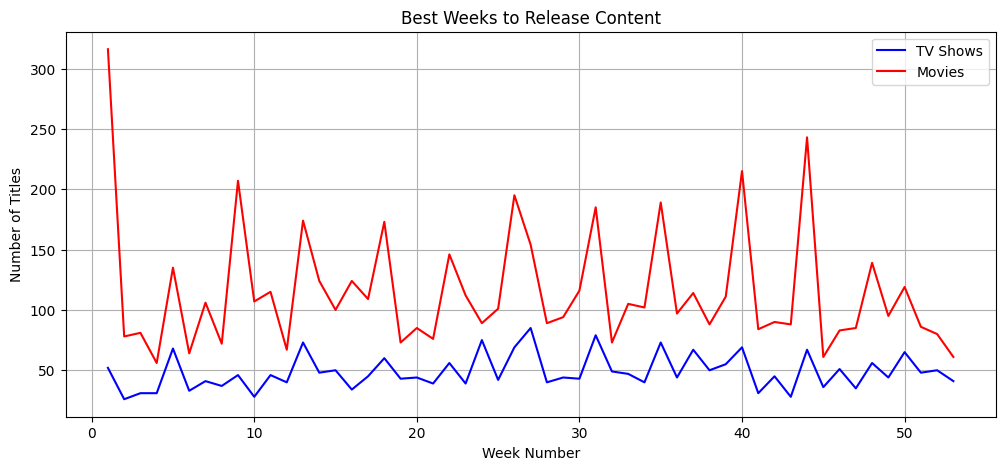

In [ ]:
# Best week to release
df['week_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.isocalendar().week
df['month_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month

tv_week = df[df['type'] == 'TV Show'].groupby('week_added')['title'].nunique()
movie_week = df[df['type'] == 'Movie'].groupby('week_added')['title'].nunique()

# Plot
plt.figure(figsize=(12, 5))
tv_week.plot(label='TV Shows', color='blue')
movie_week.plot(label='Movies', color='red')
plt.legend()
plt.title("Best Weeks to Release Content")
plt.xlabel("Week Number")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()



In [ ]:
# Top 10 actors
df_cast = df.dropna(subset=['cast']).copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')
top_actors = df_cast['cast'].value_counts().head(10)

# Top 10 directors
df_director = df.dropna(subset=['director']).copy()
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')
top_directors = df_director['director'].value_counts().head(10)


In [ ]:
# Convert release year to datetime (approximate)
df['release_date'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Difference in days
df['days_to_add'] = (df['date_added'] - df['release_date']).dt.days
# Drop NaNs and get mode
days_to_add_mode = df['days_to_add'].dropna().mode()[0]
print("Mode of days taken to add to Netflix:", days_to_add_mode)


Mode of days taken to add to Netflix: 334.0


In [ ]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')
df['country'] = df['country'].astype('category')


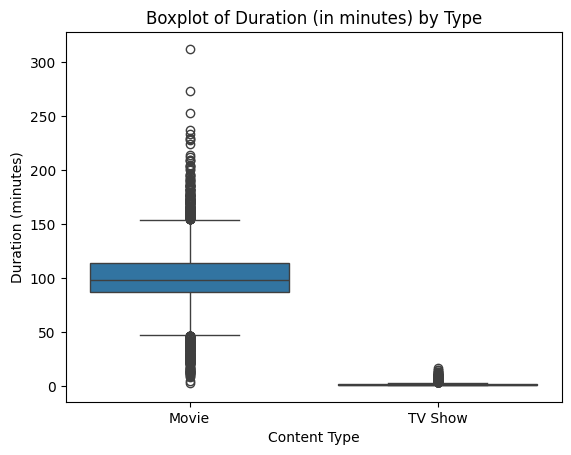

In [ ]:
# Extract numeric values from duration (only works for movies)
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot
sns.boxplot(data=df, x='type', y='duration_mins')
plt.title("Boxplot of Duration (in minutes) by Type")
plt.xlabel("Content Type")
plt.ylabel("Duration (minutes)")
plt.show()



**INSIGHTS **:

1. Content Type Distribution: Movies vs TV Shows:Movies dominate Netflix’s catalog, comprising approximately 70% of all titles, while TV Shows account for the remaining 30%. This suggests Netflix prioritizes short-form, standalone content over serialized formats.
2.  Top Countries Producing Content:The United States is by far the leading producer of Netflix content, followed by India, the UK, and Canada. This reflects the strong media industries and consumer demand in these countries.
3. Rating Distribution:Most content is targeted toward mature audiences, with TV-MA and TV-14 being the most common ratings. This implies Netflix's content leans toward adult themes and storytelling.
4. Top Genres:Dramas, comedies, and international TV are the most frequent genres. Netflix is investing heavily in relatable and globally diversified storytelling to engage a wide audience base.
5. Movies vs TV Shows by Country:The US and India lead in both movies and TV shows, but some countries like South Korea and Japan are more focused on TV content, aligning with global K-Drama and anime trends.
6. Best Week & Month to Release Content:Most titles are added between July and December, with a noticeable spike around holiday periods (September to December). This reflects a strategic release model aiming to capitalize on viewer availability.
7. Top Directors and Actors:Rajiv Chilaka and Martin Scorsese are among the most frequent directors. Animesh, Noah Centineo, and Jackie Chan are top actors. This shows a mix of children's content, action, and drama gaining popularity.
8. Duration Analysis:Most movies range between 80–120 minutes, while TV shows are primarily 1-2 seasons. This implies that Netflix caters to both short-binge and feature-length preferences.
9. Top Genres by TV vs Movie:TV Shows are predominantly International TV and Reality TV, while Movies are often dramas and documentaries, showing a deliberate genre mix across formats.
10. Actor–Director Combination:Some actor-director pairs work together frequently (e.g., Rajiv Chilaka with voice actors from Indian animation), reflecting Netflix’s recurring collaboration trends in certain franchises.
11. Days from Release to Netflix Addition:The mode for days to add content after release is around 365 days, indicating a standard delay of about a year before movies become available on the platform.
12. Heatmap of Releases by Weekday & Month:Content is most frequently added on Fridays and Sundays, targeting weekends when viewership peaks. October and December are the most content-rich months.

RECOMMENDATIONS:
1.Invest more in genres like Drama and International TV, as they are most popular.

2.Add content in South Korea and Japan to capture growing regional audiences.

3.Plan releases on Fridays and Sundays for better engagement.



Netflix should expand Indian and regional content, leveraging strong local demand. Maintain Friday and holiday-season releases to maximize visibility and engagement. Invest more in short-format content—mini-series, documentaries, and under-100-minute films—which align with user preferences. Tailor genre marketing by region: push comedy in India, thrillers in the US. Strengthen exclusive partnerships with popular actors and directors seen frequently in the catalog. These strategies, rooted in data insights, can help Netflix increase viewer retention, grow in emerging markets, and refine its global content development approach.